# DEMAND

In [ ]:
!pip install keras-tuner --upgrade
!pip install humanfriendly

In [ ]:
import os
import random
%pwd
import glob  # from os import chdir      from glob import glob
from math import*
import numpy as np   # from numpy import*   from numpy import sqrt
from numpy import load

import pandas as pd   # from pandas import*
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import save_model
from tensorflow.keras.models import model_from_json

from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.utils import plot_model
from IPython.display import Image

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from pickle import dump,load

import warnings
warnings.simplefilter("ignore", UserWarning)

import seaborn as sns

from io import StringIO

# import plotly.express as px  # for data visualization

import copy

import itertools

from datetime import datetime, date, time, timedelta

import decimal
decimal.getcontext().prec=6 # This changes float to decimals  - check if the rounding errors are now gone
print(decimal.getcontext())

# from keras_tuner.tuners import RandomSearch
# from keras_tuner.tuners import BayesianOptimization
# from keras_tuner.engine.hyperparameters import HyperParameters
from keras.utils import plot_model
from IPython.display import Image


np.random.seed(1)

os.chdir
# Set the WD
# %cd "/na/daily"     # This is for the datasets as the WD

pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})  #supress scientific notations

# import talos
import time
import datetime
from humanfriendly import format_timespan
import http.client
import urllib.parse
import pandas as pd   # from pandas import*
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
import sklearn
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from keras_tuner import BayesianOptimization, Objective, HyperParameters
import gc
import time
from humanfriendly import format_timespan
import http.client, urllib.parse
import decimal
decimal.getcontext().prec=6 # This changes float to decimals  - check if the rounding errors are now gone

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload")  # set WD

Context(prec=6, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])
Mounted at /content/drive


In [ ]:
%pwd

'/notebooks'

In [ ]:
# Load the DEMAND data - winter/summer embeddings / change the load_data function based on these!!!
CH_data_demand = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data_11_5_2025/CH_data_demand_14_4_GRID_max.csv')
CH_data_demand = CH_data_demand.drop(columns=['Unnamed: 0'])
CH_data_demand['survey_duration'] = pd.to_timedelta(CH_data_demand['survey_duration'])
CH_data_demand = CH_data_demand.dropna(subset=['grid_abelow_biom']).reset_index(drop=True)
images_vectors_with_embeddings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Images/Demand/demand_winter_summer_embeddings_Grid_Max.csv')
images_vectors_with_embeddings = images_vectors_with_embeddings.drop(columns=['Unnamed: 0'])
#add columns of images_vectors_with_embeddings to  CH_data_demand on the right side of CH_data_demand
CH_data_demand = pd.concat([CH_data_demand, images_vectors_with_embeddings], axis=1)
cols_to_drop_on_nan = [col for col in CH_data_demand.columns if 'image_vector' in col.lower()]
CH_data_demand.dropna(subset=cols_to_drop_on_nan, inplace=True)

In [ ]:
# DEFINE THE DATA

# group variables
interval_independent_variables_list = [
    'grid_lon', 'grid_lat', 'grid_abelow_biom', 'grid_abelow_carbon',
    'grid_above_biomass', 'grid_above_carbon',  'grid_accessibility',
    'grid_density' , 'grid_et', 'grid_gsv', 'grid_increment',
    'grid_rainfall', 'grid_slope', 'grid_access2015',
    'grid_ruggedness', 'grid_ownership',
    'grid_abies', 'grid_alnus', 'grid_betula',
    'grid_broadleaves', 'grid_carpinus', 'grid_castanea', 'grid_conifers',
    'grid_eucalyptus', 'grid_fagus', 'grid_fraxinus', 'grid_larix',
    'grid_picea', 'grid_pines', 'grid_pinuspinaster',
    'grid_pinussylvestris', 'grid_populus', 'grid_pseudotsuga',
    'grid_quercusmisc', 'grid_quercusrobur', 'grid_robinia',
    'grid_Pathfinder_age_class', 'grid_Pathfinder_disturbance_size',
    'grid_Pathfinder_disturbance_freq', 'grid_Pathfinder_forest_mask',

]

# embeddings_independent_variables = CH_data_demand.iloc[:,-1024:].columns.tolist()
# length_of_embeddings = images_vectors_with_embeddings.shape[1] - 3
# embeddings_independent_variables = CH_data_demand.iloc[:,-length_of_embeddings:].columns.tolist() # CHANGE THIS TO GEOCLIP, SATCLIP length !!!!
embeddings_independent_variables = [col for col in CH_data_demand.columns if 'image_vector' in col.lower()] # This option is for best pixel version # image_vector for winter_sumer; embedding for best pixel version

categorical_complex_independent_variables = [
    'grid_countries',
    'grid_dominant',
    'grid_Corine_2018',
    'grid_CLC_Nomenclature',
    'grid_CLC_Forest',
    'grid_Pathfinder_management',
    'grid_IIASA_management',
]

dummy_categorical_independent_variables = [
    'grid_bearing_cap',
    'grid_asites_forest',
    'grid_bsites_forest',
    'grid_csites_forest',
    'grid_Pathfinder_even_aged',
    'grid_Pathfinder_primary_forest'
]

dependent_variables = [
    'survey_q14_Lr1r1_timber',
    'survey_q14_Lr2r1_fuelwood',
    'survey_q14_Lr3r1_NWFP',
    'survey_q14_Lr4r1_hunting',
    'survey_q14_Lr5r1_water and soil protection',
    'survey_q14_Lr6r1_air quality',
    'survey_q14_Lr7r1_carbon storage',
    'survey_q14_Lr8r1_habitat for plans and animals',
    'survey_q14_Lr9r1_cultural, emotional and spiritual value',
    'survey_q14_Lr10r1_education',
    'health_and_recreation'
]

In [ ]:
# FUNCTIONS

# Load the data

def load_data(dependent_variables):
    CH_data_demand = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data_11_5_2025/CH_data_demand_14_4_GRID_max.csv')
    CH_data_demand = CH_data_demand.drop(columns=['Unnamed: 0'])
    CH_data_demand['survey_duration'] = pd.to_timedelta(CH_data_demand['survey_duration'])
    CH_data_demand = CH_data_demand.dropna(subset=['grid_abelow_biom']).reset_index(drop=True)
    images_vectors_with_embeddings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Images/Demand/demand_winter_summer_embeddings_Grid_Max.csv')
    images_vectors_with_embeddings = images_vectors_with_embeddings.drop(columns=['Unnamed: 0'])
    #add columns of images_vectors_with_embeddings to  CH_data_demand on the right side of CH_data_demand
    CH_data_demand = pd.concat([CH_data_demand, images_vectors_with_embeddings], axis=1)
    cols_to_drop_on_nan = [col for col in CH_data_demand.columns if 'image_vector' in col.lower()]
    CH_data_demand.dropna(subset=cols_to_drop_on_nan, inplace=True)
    # REPLACE UNTIL HERE BASED ON DATA INPUT
    # survey_x_coo and survey_y_coo coordinates are the same in both files - so it's OK!
    CH_data_demand = CH_data_demand.dropna(subset=['grid_bearing_cap']).reset_index(drop=True)
    cols_to_drop = ['survey_q15','survey_q16','survey_q17r1','survey_noanswerq17_r2','survey_q18b_Lr1','survey_q18b_Lr2','survey_q18b_Lr3','survey_q18b_Lr4','survey_q18b_Lr5','survey_q18b_Lr6','survey_q18b_Lr7','survey_q18b_Lr8','survey_q18b_Lr9','survey_q18b_Lr10','survey_q20r1','survey_q20r2','survey_q20r3','survey_q20r4','survey_q20r5','survey_q20r6','survey_q20r7','survey_q20r8','survey_q20r9','survey_q20r10','survey_q20r11','survey_q20r12','survey_q20r13','survey_q20r14','survey_q21r1','survey_q21r2','survey_q21r3','survey_q21r4','survey_q21r5','survey_q21r6','survey_q21r7','survey_q21r8','survey_q21r9','survey_x_coo','survey_y_coo', 'survey_Q9_latitude', 'survey_Q9_longitude']
    CH_data_demand = CH_data_demand.drop(columns=cols_to_drop)
    cols_to_drop = ['survey_q14_Lr13r1_hazard reduction', 'survey_q14_Lr14r1_job opportunities', 'survey_q14_Lr15r1_beauty', 'survey_q14_Lr16r1_noise reduction', 'survey_q14_Lr17r1_temperature reduction']
    CH_data_demand = CH_data_demand.drop(columns=cols_to_drop)
    CH_data_demand = CH_data_demand.dropna(subset=['grid_countries']) # also drop rows that are NA in countries, i.e. don't have country designation
    CH_data_demand = CH_data_demand.dropna(subset=['grid_dominant']).reset_index(drop=True) # these have NAs also in all columns related to tree species
    CH_data_demand['health_and_recreation'] = CH_data_demand[['survey_q14_Lr12r1_health and wellbeing', 'survey_q14_Lr11r1_recreation']].mean(axis=1)
    CH_data_demand = CH_data_demand.drop(columns=['survey_q14_Lr11r1_recreation', 'survey_q14_Lr12r1_health and wellbeing'])
    # Make variables for cutting criterion
    CH_data_demand['value_counts'] = CH_data_demand[dependent_variables].apply(count_values_in_row, axis=1)
    CH_data_demand['nan_count'] = CH_data_demand[dependent_variables].isnull().sum(axis=1)
    std_devs = CH_data_demand[dependent_variables].std(axis=1)
    std_devs_scaled = (std_devs - min(std_devs)) / (max(std_devs) - min(std_devs)) * 100
    CH_data_demand['std_devs_scaled'] = std_devs_scaled
    # Calculate 'health_and_recreation' after all other filtering and dropping

    return CH_data_demand

def count_values_in_row(row):
  counts = {0: 0, 100: 0, 1: 0, 99:0 } # try also with 1 and 99
  for value in row:
    if value in counts:
      counts[value] += 1
  return sum(counts.values())


def prepare_data(CH_data_demand, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, dependent_variables):
    CH_data_demand_categorical = pd.DataFrame()
    # Iterate through the categorical columns
    for col in categorical_complex_independent_variables:
        # Perform one-hot encoding
        one_hot = pd.get_dummies(CH_data_demand[col], prefix=col, dtype=int)
        # Concatenate the one-hot encoded columns to the new DataFrame
        CH_data_demand_categorical = pd.concat([CH_data_demand_categorical, one_hot], axis=1)
    CH_data_demand_independent_categorical_variables = pd.concat([CH_data_demand_categorical, CH_data_demand[dummy_categorical_independent_variables]], axis=1)
    # Separate dependent variable
    CH_data_demand_dependent_variables = CH_data_demand[dependent_variables]
    CH_data_demand_embeddings_independent_variables = CH_data_demand[embeddings_independent_variables]



    # Separate independent interval variable
    CH_data_demand_interval_independent_variables = CH_data_demand[interval_independent_variables_list]
    interval_with_na = CH_data_demand_interval_independent_variables.columns[CH_data_demand_interval_independent_variables.isna().any()].tolist()
    dependent_with_na = CH_data_demand_dependent_variables.columns[CH_data_demand_dependent_variables.isna().any()].tolist()

    # with MICE, estimate the missing data  - here for interval independent
    imputer = IterativeImputer(random_state=100, max_iter=10)
    if len(interval_with_na) > 0:
        interval_with_na_data = CH_data_demand_interval_independent_variables[interval_with_na]
        imputer.fit(interval_with_na_data)
        df_imputed = imputer.transform(interval_with_na_data)
        CH_data_demand_interval_independent_variables[interval_with_na] = df_imputed

    # with MICE, estimate the missing data  - here for dependent
    imputer = IterativeImputer(random_state=100, max_iter=10)
    if len(dependent_with_na) > 0:
        dependent_with_na_data = CH_data_demand_dependent_variables[dependent_with_na]
        imputer.fit(dependent_with_na_data)
        df_imputed = imputer.transform(dependent_with_na_data)
        # Assign imputed values back to the original DataFrame using column names
        CH_data_demand_dependent_variables.loc[:, dependent_with_na] = df_imputed
    all_variables = pd.concat([CH_data_demand_interval_independent_variables, CH_data_demand_independent_categorical_variables , CH_data_demand_dependent_variables, CH_data_demand_embeddings_independent_variables], axis=1)
    train, temp = train_test_split(all_variables, test_size=0.2, random_state=42)  # 80% train, 20% temp.
    validate, test = train_test_split(temp, test_size=0.5, random_state=42)  # Split temp into 50% validate, 50% test
    X_train_interval = train[CH_data_demand_interval_independent_variables.columns]
    X_train_categorical = train[CH_data_demand_independent_categorical_variables.columns]
    X_train_embeddings = train[CH_data_demand_embeddings_independent_variables.columns]
    y_train = train[CH_data_demand_dependent_variables.columns]

    X_validate_interval = validate[CH_data_demand_interval_independent_variables.columns]
    X_validate_categorical = validate[CH_data_demand_independent_categorical_variables.columns]
    X_validate_embeddings = validate[CH_data_demand_embeddings_independent_variables.columns]
    y_validate = validate[CH_data_demand_dependent_variables.columns]

    X_test_interval = test[CH_data_demand_interval_independent_variables.columns]
    X_test_categorical = test[CH_data_demand_independent_categorical_variables.columns]
    X_test_embeddings = test[CH_data_demand_embeddings_independent_variables.columns]
    y_test = test[CH_data_demand_dependent_variables.columns]

    # Scale the data
    sc_dependent_train = MinMaxScaler(feature_range = (0, 1))
    dependent_train = sc_dependent_train.fit_transform(y_train)
    sc_dependent_validate = MinMaxScaler(feature_range = (0, 1))
    dependent_validate = sc_dependent_validate.fit_transform(y_validate)
    sc_dependent_test = MinMaxScaler(feature_range = (0, 1))
    dependent_test = sc_dependent_test.fit_transform(y_test)
    sc_interval_independent_train = MinMaxScaler(feature_range = (0, 1))
    interval_independent_train = sc_interval_independent_train.fit_transform(X_train_interval)
    sc_interval_independent_validate = MinMaxScaler(feature_range = (0, 1))
    interval_independent_validate = sc_interval_independent_validate.fit_transform(X_validate_interval)
    sc_interval_independent_test = MinMaxScaler(feature_range = (0, 1))
    interval_independent_test = sc_interval_independent_test.fit_transform(X_test_interval)
    sc_embeddings_train = MinMaxScaler(feature_range = (0, 1))
    embeddings_train = sc_embeddings_train.fit_transform(X_train_embeddings)
    sc_embeddings_validate = MinMaxScaler(feature_range = (0, 1))
    embeddings_validate = sc_embeddings_validate.fit_transform(X_validate_embeddings)
    sc_embeddings_test = MinMaxScaler(feature_range = (0, 1))
    embeddings_test = sc_embeddings_test.fit_transform(X_test_embeddings)
    independent_categorical_test = X_test_categorical.to_numpy()
    independent_categorical_train = X_train_categorical.to_numpy()
    independent_categorical_validate = X_validate_categorical.to_numpy()
    return interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test


def rescale_df(df):
    scaled_df = df.copy()
    for col in scaled_df.columns:
        min_val = scaled_df[col].min()
        max_val = scaled_df[col].max()
        # Avoid division by zero if all values in the column are the same
        if max_val - min_val != 0:
            scaled_df[col] = (scaled_df[col] - min_val) / (max_val - min_val)
        else:
            # If all values are the same, they will all be 0 after min_val subtraction,
            # which is already in the [0, 1] range.
            scaled_df[col] = 0
    return scaled_df


def send_push_final(total_elapsed_time, total_no_iterations):
    token = 'ZZZ'
    user = 'YYY'
    conn = http.client.HTTPSConnection("api.pushover.net:443")
    conn.request("POST", "/1/messages.json",
      urllib.parse.urlencode({
        "token": token,
        "user": user,
        "title": "Three layers training demand",
        "message": f"Total elapsed time = {total_elapsed_time} \n Total no of iterations = {total_no_iterations}",
      }), { "Content-type": "application/x-www-form-urlencoded" })
    conn.getresponse()


def build_model(hp):
    input_interval = Input(shape=(interval_independent_train.shape[1],), name='interval_input')
    input_categorical = Input(shape=(independent_categorical_train.shape[1],), name='categorical_input')
    input_embeddings = Input(shape=(embeddings_train.shape[1],), name='embeddings_input')


    # the first branch operates on the interval input
    x = Dense(units=hp.Int('dense_int_0', min_value=500, max_value=800, step=50), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_int_0', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_int_0')(input_interval)
    x = BatchNormalization(name='batch_norm_int_0')(x)
    x = Dropout(hp.Float('INT_DROP_0', min_value=0.1, max_value=0.5,step=0.1), name = 'INT_DROP_0')(x)
    x = Dense(units=hp.Int('dense_int_1', min_value=256, max_value=512, step=64), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_int_1', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_int_1')(x)
    x = BatchNormalization(name='batch_norm_int_1')(x)
    x = Dropout(hp.Float('INT_DROP_1', min_value=0.1, max_value=0.5,step=0.1), name = 'INT_DROP_1')(x)
    x = Model(inputs=input_interval, outputs=x)

    # the second branch opreates on the categorical input
    y = Dense(units=hp.Int('dense_cat_0', min_value=60, max_value=100, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_cat_0', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_cat_0')(input_categorical)
    y = BatchNormalization(name='batch_norm_cat_0')(y)
    y = Dropout(hp.Float('CAT_DROP_0', min_value=0.1, max_value=0.5,step=0.1), name = 'CAT_DROP_0')(y)
    y = Dense(units=hp.Int('dense_cat_1', min_value=10, max_value=50, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_cat_1', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_cat_1')(y)
    y = BatchNormalization(name='batch_norm_cat_1')(y)
    y = Dropout(hp.Float('CAT_DROP_1', min_value=0.1, max_value=0.5,step=0.1), name = 'CAT_DROP_1')(y)
    y = Model(inputs=input_categorical, outputs=y)

    # the third branch opreates on the embeddings input
    a = Dense(units=hp.Int('dense_emb_0', min_value=600, max_value=2000, step=100), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_emb_0', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_emb_0')(input_embeddings)
    a = BatchNormalization(name='batch_norm_emb_0')(a)
    a = Dropout(hp.Float('EMB_DROP_0', min_value=0.1, max_value=0.5,step=0.1), name = 'EMB_DROP_0')(a)
    a = Dense(units=hp.Int('dense_emb_1', min_value=200, max_value=600, step=100), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_emb_1', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_emb_1')(a)
    a = BatchNormalization(name='batch_norm_emb_1')(a)
    a = Dropout(hp.Float('EMB_DROP_1', min_value=0.1, max_value=0.5,step=0.1), name = 'EMB_DROP_1')(a)
    a = Dense(units=hp.Int('dense_emb_2', min_value=10, max_value=100, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_emb_2', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_emb_2')(a)
    a = BatchNormalization(name='batch_norm_emb_2')(a)
    a = Dropout(hp.Float('EMB_DROP_2', min_value=0.1, max_value=0.5,step=0.1), name = 'EMB_DROP_2')(a)
    a = Model(inputs=input_embeddings, outputs=a)

    combined = concatenate([x.output, y.output, a.output])

    z = Dense(units=hp.Int('dense_comb_0', min_value=100, max_value=200, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_comb_0', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_comb_0')(combined)
    z = BatchNormalization(name='batch_norm_comb_0')(z)
    z = Dropout(hp.Float('COMB_DROP_1', min_value=0.1, max_value=0.5,step=0.1), name = 'COMB_DROP_1')(z)
    z = Dense(units=hp.Int('dense_comb_1', min_value=60, max_value=100, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_comb_1', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_comb_1')(z)
    z = BatchNormalization(name='batch_norm_comb_1')(z)
    z = Dropout(hp.Float('COMB_DROP_2', min_value=0.1, max_value=0.5,step=0.1), name = 'COMB_DROP_2')(z)
    z = Dense(units=hp.Int('dense_comb_2', min_value=20, max_value=50, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_comb_2', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_comb_2')(z)
    z = BatchNormalization(name='batch_norm_comb_2')(z)
    z = Dropout(hp.Float('COMB_DROP_3', min_value=0.1, max_value=0.5,step=0.1), name = 'COMB_DROP_3')(z)
    z = Dense(dependent_test.shape[1], activation="linear", name = 'output_layer')(z)
    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=[x.input, y.input, a.input], outputs=z)
    model.compile(loss='mae', metrics=['mae'], optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')))
    return model


def model_and_predict_step_saving_models(interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test, verbose, tuning_path, batch_size, max_trials, num_epochs, dependent_variables):
    es = EarlyStopping(monitor="val_mae", min_delta=0.0001, patience=1, restore_best_weights=True)
    bayesian_opt_tuner = BayesianOptimization(build_model,objective=Objective("val_loss", direction="min"), max_trials=max_trials, executions_per_trial=1, directory=tuning_path, project_name='kerastuner_bayesian_poc', overwrite=True)
    bayesian_opt_tuner.search([interval_independent_train, independent_categorical_train, embeddings_train], dependent_train,epochs=num_epochs, validation_data = ([interval_independent_validate, independent_categorical_validate, embeddings_validate], dependent_validate), verbose=verbose, batch_size = batch_size, callbacks=[es])
    best_hps = bayesian_opt_tuner.get_best_hyperparameters(num_trials=1)[0]
    # bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
    # model = bayes_opt_model_best_model[0]
    # predicted = model.predict([interval_independent_test, independent_categorical_test, embeddings_test])
    tune_res = pd.DataFrame()
    for trial_id in bayesian_opt_tuner.oracle.trials:
        trial = bayesian_opt_tuner.oracle.trials[trial_id] #Get the trial object
        trial_state = trial.get_state()
        trial_hyperparameters = pd.Series(
            trial_state["hyperparameters"]["values"],
            index = trial_state["hyperparameters"]["values"].keys())
        trial_loss = pd.Series(trial_state["score"], index = ["val_loss"])
        trial_val_mae = pd.Series(trial_state['metrics']['metrics']['val_mae']['observations'][0]['value'], index=['val_mae'])
        trial_tune_res = pd.concat([trial_hyperparameters, trial_loss, trial_val_mae])
        trial_tune_res.name = trial_id
        tune_res = pd.concat([tune_res, trial_tune_res], axis = 1)
    tune_res = tune_res.T

    # here only check saving of mae values
    mean_mae_values = [] # Keep this as a list
    best_models = bayesian_opt_tuner.get_best_models(num_models=max_trials)
    for i, model in enumerate(best_models):
        model_save_path = os.path.join(tuning_path, f'best_model_{i}.keras')
        model.save(model_save_path)
        print(f"Best model {i} saved to {model_save_path}")
        predicted = model.predict([interval_independent_test, independent_categorical_test, embeddings_test])
        dependent_test_df = pd.DataFrame(dependent_test, columns=dependent_variables)
        predicted_df = pd.DataFrame(predicted, columns=dependent_variables)
        predicted_df = rescale_df(predicted_df)
        dependent_test_df = rescale_df(dependent_test_df)
        mae_per_column = {}
        for col in dependent_test_df.columns:
            mae = mean_absolute_error(dependent_test_df[col], predicted_df[col])
            mae_per_column[col] = mae
        mean_mae = sum(mae_per_column.values()) / len(mae_per_column)
        mean_mae_values.append(mean_mae) # Append to the list
    mean_mae_series = pd.Series(mean_mae_values)
    mean_mae_df = pd.DataFrame({'test_mae': mean_mae_values})
    tune_res = tune_res.reset_index(drop=True)
    mean_mae_df = mean_mae_df.reset_index(drop=True)
    results = pd.concat([tune_res, mean_mae_df], axis=1, ignore_index=False)
    # model.reset_states()
    return results

In [ ]:
# Up to here, we have defined the best version how to prepare the data, i.e. have
# defined best (i.e. lowest MEA on test data) values for criteria:  distances  value_counts  nan_counts  survey_durations_min  std_devs_scaled_min

In [ ]:
# now do V2 of HP tuning based on best data cut-off values
# Here we save the actual model and the values that describe it (HPs + loss + MAEs)
# this model here is the one that will be used to estimate the demand data for entire data-set of Europe's forests

In [ ]:
results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload/800_HP_Tuning_level_1_demand_embeddings.csv')
results = results.drop(columns=['Unnamed: 0'])

In [ ]:
# GENERAL HP TUNING

# distances = [600, 700, 800, 900, 1000]  # [600, 700, 800, 900, 1000] FULL LIST
value_counts = [5] # [3, 4, 5, 6]
nan_counts = [3, 4, 5] # [3, 4, 5]
survey_durations_min = [pd.Timedelta(minutes=7), pd.Timedelta(minutes=8), pd.Timedelta(minutes=9)]
std_devs_scaled_min = [0, 4, 8]


total_start = time.time()

distance = 800 # CHANGE HERE # Tun on multiple platforms, each with different distance.

batch_size = 8
num_epochs = 200 # This is for the single increment of re-training
max_epochs = 120
verbose = 1
max_trials = 30 # MODIFY THIS

# results = pd.DataFrame()

for value_count in value_counts:
    for nan_count in nan_counts:
        for survey_duration_min in survey_durations_min:
            for std_dev_scaled_min in std_devs_scaled_min:

                total_no_iterations = max_trials
                lengths_CH_data_demand = pd.DataFrame()
                data_length = len(CH_data_demand)
                tuning_path = f"/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_demand_800m/{distance}_{value_count}_{nan_count}_{int(survey_duration_min.total_seconds()/60)}_{std_dev_scaled_min}"
                if not os.path.exists(tuning_path):
                    os.makedirs(tuning_path)
                time.sleep(10) # Need to wait, on some platforms making new folders is slow. If it's not working, increase time
                row_info = pd.DataFrame({
                    'distance': [distance] * max_trials,
                    'value_count': [value_count] * max_trials,
                    'nan_count': [nan_count] * max_trials,
                    'survey_duration_min': [int(survey_duration_min.total_seconds()/60)] * max_trials,
                    'std_dev_scaled_min': [std_dev_scaled_min] * max_trials,
                    'data_length': [data_length] * max_trials
                })
                CH_data_demand = load_data(dependent_variables)
                CH_data_demand = CH_data_demand[CH_data_demand['distance'] <= distance] # keep only rows where CH_data_demand['distance'] is equal or les than 750
                CH_data_demand = CH_data_demand[CH_data_demand['value_counts'] <= value_count]
                CH_data_demand = CH_data_demand[CH_data_demand['nan_count'] < nan_count] # No need to change this, there are few unanswered
                CH_data_demand = CH_data_demand[CH_data_demand['survey_duration'] >= survey_duration_min] # from CH_data_demand, remove rows where CH_data_demand['duration'] less than X minutes
                CH_data_demand = CH_data_demand[CH_data_demand['std_devs_scaled'] > std_dev_scaled_min] # No need to change this, there are few unanswered
                data_length = len(CH_data_demand)

                interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test = prepare_data(CH_data_demand, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, dependent_variables)

                results_one_loop  = model_and_predict_step_saving_models(interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test, verbose, tuning_path, batch_size, max_trials, num_epochs, dependent_variables)

                row_info = row_info.reset_index(drop=True)
                results_one_loop = results_one_loop.reset_index(drop=True)
                results_one_loop = pd.concat([row_info, results_one_loop], axis = 1, ignore_index=False)
                results_one_loop = results_one_loop.reset_index(drop=True)
                results = pd.concat([results, results_one_loop], axis = 0, ignore_index=True)
                results.to_csv('800_HP_Tuning_level_1_demand_embeddings.csv')

total_end = time.time()
total_elapsed_seconds = total_end - total_start
total_elapsed_time = format_timespan(total_elapsed_seconds)
send_push_final(total_elapsed_time, total_no_iterations)

In [ ]:
# END

In [ ]:
# There are many saved models for each combination of data pre-processing (i.e. different cut-off values)
# The CSV file that tracks the MAE values states which combination of cut-off values produces smallest MAE
# However, there are 30 models for each configuration, and it's not certain by index of the CSV file which model out of these is actually the best one
# To get this, cut from the CSV file row with best HP values and make it to a vertical table
# Keep columns that are just HP values, cut everything else. Cut also the learning rate info, as this is not preserved in the CSV file that tracks HP tuning
# Load the best HP parameters dataframe
best_HP_parameters = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload/best_HP_values_demand_step_1.csv', sep=';')


# then compare these criteria against the HP of each model in the folder
# The code below will tell you the name of the file / which model is actually the best
# Save that one and delete all other ones

# Directory containing the Keras models
model_dir = "/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_supply_1000m/Keras_models"

best_match_score = -1
best_match_filename = None

# Iterate through all files in the directory
for filename in os.listdir(model_dir):
    if filename.endswith(".keras"):  # Assuming models are saved in .keras format
        model_path = os.path.join(model_dir, filename)
        print(f"Checking model: {filename}")

        try:
            # Load the model
            loaded_model = tf.keras.models.load_model(model_path)

            # Check layer output shapes
            matching_layers = 0
            print("Layer shape comparison:")
            for index, row in best_HP_parameters.iterrows():
                layer_name_to_check = row['LAYER']
                # Ensure the 'VALUE' is treated as an integer for comparison with layer units
                expected_shape_value = int(row['VALUE'])

                if layer_name_to_check in [layer.name for layer in loaded_model.layers]:
                    layer = loaded_model.get_layer(layer_name_to_check)
                    # Check for Dense layers and their 'units' attribute
                    if isinstance(layer, tf.keras.layers.Dense):
                        actual_shape_value = layer.units
                        print(f"  - Layer '{layer_name_to_check}': Expected shape value = {expected_shape_value}, Actual shape value = {actual_shape_value}")
                        if actual_shape_value == expected_shape_value:
                            matching_layers += 1
                    # You can add checks for other layer types if needed (e.g., LSTM, GRU)
                    elif hasattr(layer, 'output_shape'):
                        # For layers with output_shape, you might need to adjust how you compare
                        # the shape based on the specific layer type and your 'VALUE' column.
                        # This example assumes 'VALUE' is meant to be the last dimension of the output shape for non-Dense layers
                        actual_output_shape = layer.output_shape
                        # Assuming output_shape is a tuple, and we compare the last dimension
                        if isinstance(actual_output_shape, tuple) and len(actual_output_shape) > 0:
                             actual_shape_value = actual_output_shape[-1]
                             print(f"  - Layer '{layer_name_to_check}': Expected shape value = {expected_shape_value}, Actual shape value = {actual_shape_value}")
                             if actual_shape_value == expected_shape_value:
                                matching_layers += 1
                        else:
                             print(f"  - Layer '{layer_name_to_check}': Could not determine comparable shape value.")
                    else:
                         print(f"  - Layer '{layer_name_to_check}': Does not have 'units' or 'output_shape' attribute for comparison.")

                else:
                    print(f"  - Layer '{layer_name_to_check}' not found in the model.")

            print(f"Number of layers with matching output shapes: {matching_layers}/{len(best_HP_parameters)}")
            print("-" * 30)

            # Update best match if current model has more matching layers
            if matching_layers > best_match_score:
                best_match_score = matching_layers
                best_match_filename = filename

        except Exception as e:
            print(f"Error loading or checking model {filename}: {e}")
            print("-" * 30)

# Print the name of the file that matches the criteria the most
if best_match_filename:
    print(f"The file that matches the criteria the most is: {best_match_filename} with {best_match_score} matching layers.")
else:
    print("No Keras models found in the specified directory.")

In [ ]:
# SECOND STEP HP TUNING
# NOW WE KNOE THE 'BEST' VALUES ON HOW TO CUT THE INPUT DATA
# WE WILL JUST USE THIS ONE CONFIGURATION AND THEN INCREASE THE NUMBER OF TRIALS
value_count = 3  # [3, 4, 5, 6]
nan_count = 3 # [3, 4, 5]
survey_duration_min = pd.Timedelta(minutes=8)
std_dev_scaled_min = 8


total_start = time.time()

distance = 1000 # NGE HERE # Tun on multiple platforms, each with different distance.

batch_size = 8
num_epochs = 200 # This is for the single increment of re-training
max_epochs = 120
verbose = 1
max_trials = 200 # MODIFY THIS

results = pd.DataFrame()

total_no_iterations = max_trials
lengths_CH_data_demand = pd.DataFrame()
data_length = len(CH_data_demand)
tuning_path = f"/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_demand_step_2/{distance}_{value_count}_{nan_count}_{8}_{std_dev_scaled_min}"
if not os.path.exists(tuning_path):
    os.makedirs(tuning_path)
time.sleep(10) # Need to wait, on some platforms making new folders is slow. If it's not working, increase time
row_info = pd.DataFrame({
    'distance': [distance] * max_trials,
    'value_count': [value_count] * max_trials,
    'nan_count': [nan_count] * max_trials,
    'survey_duration_min': 8 * max_trials,
    'std_dev_scaled_min': [std_dev_scaled_min] * max_trials,
    'data_length': [data_length] * max_trials
})
CH_data_demand = load_data(dependent_variables)
CH_data_demand = CH_data_demand[CH_data_demand['distance'] <= distance] # keep only rows where CH_data_demand['distance'] is equal or les than 750
CH_data_demand = CH_data_demand[CH_data_demand['value_counts'] <= value_count]
CH_data_demand = CH_data_demand[CH_data_demand['nan_count'] < nan_count] # No need to change this, there are few unanswered
CH_data_demand = CH_data_demand[CH_data_demand['survey_duration'] >= survey_duration_min] # from CH_data_demand, remove rows where CH_data_demand['duration'] less than X minutes
CH_data_demand = CH_data_demand[CH_data_demand['std_devs_scaled'] > std_dev_scaled_min] # No need to change this, there are few unanswered
data_length = len(CH_data_demand)

interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test = prepare_data(CH_data_demand, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, dependent_variables)

results_one_loop  = model_and_predict_step_saving_models(interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test, verbose, tuning_path, batch_size, max_trials, num_epochs, dependent_variables)

row_info = row_info.reset_index(drop=True)
results_one_loop = results_one_loop.reset_index(drop=True)
results_one_loop = pd.concat([row_info, results_one_loop], axis = 1, ignore_index=False)
results_one_loop = results_one_loop.reset_index(drop=True)
results = pd.concat([results, results_one_loop], axis = 0, ignore_index=True)
results.to_csv('HP_Tuning_level_2_demand_embeddings.csv')

total_end = time.time()
total_elapsed_seconds = total_end - total_start
total_elapsed_time = format_timespan(total_elapsed_seconds)
send_push_final(total_elapsed_time, total_no_iterations)

In [ ]:
# There are many saved models for each combination of data pre-processing (i.e. different cut-off values)
# The CSV file that tracks the MAE values states which combination of cut-off values produces smallest MAE
# However, there are 30 models for each configuration, and it's not certain by index of the CSV file which model out of these is actually the best one
# To get this, cut from the CSV file row with best HP values and make it to a vertical table
# Keep columns that are just HP values, cut everything else. Cut also the learning rate info, as this is not preserved in the CSV file that tracks HP tuning
# Load the best HP parameters dataframe
best_HP_parameters = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload/best_HP_values_demand_step_2.csv')


# then compare these criteria against the HP of each model in the folder
# The code below will tell you the name of the file / which model is actually the best
# Save that one and delete all other ones

# Directory containing the Keras models
model_dir = "/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_demand_step_2/1000_3_3_8_8"

best_match_score = -1
best_match_filename = None

# Iterate through all files in the directory
for filename in os.listdir(model_dir):
    if filename.endswith(".keras"):  # Assuming models are saved in .keras format
        model_path = os.path.join(model_dir, filename)
        print(f"Checking model: {filename}")

        try:
            # Load the model
            loaded_model = tf.keras.models.load_model(model_path)

            # Check layer output shapes
            matching_layers = 0
            print("Layer shape comparison:")
            for index, row in best_HP_parameters.iterrows():
                layer_name_to_check = row['LAYER']
                # Ensure the 'VALUE' is treated as an integer for comparison with layer units
                expected_shape_value = int(row['VALUE'])

                if layer_name_to_check in [layer.name for layer in loaded_model.layers]:
                    layer = loaded_model.get_layer(layer_name_to_check)
                    # Check for Dense layers and their 'units' attribute
                    if isinstance(layer, tf.keras.layers.Dense):
                        actual_shape_value = layer.units
                        print(f"  - Layer '{layer_name_to_check}': Expected shape value = {expected_shape_value}, Actual shape value = {actual_shape_value}")
                        if actual_shape_value == expected_shape_value:
                            matching_layers += 1
                    # You can add checks for other layer types if needed (e.g., LSTM, GRU)
                    elif hasattr(layer, 'output_shape'):
                        # For layers with output_shape, you might need to adjust how you compare
                        # the shape based on the specific layer type and your 'VALUE' column.
                        # This example assumes 'VALUE' is meant to be the last dimension of the output shape for non-Dense layers
                        actual_output_shape = layer.output_shape
                        # Assuming output_shape is a tuple, and we compare the last dimension
                        if isinstance(actual_output_shape, tuple) and len(actual_output_shape) > 0:
                             actual_shape_value = actual_output_shape[-1]
                             print(f"  - Layer '{layer_name_to_check}': Expected shape value = {expected_shape_value}, Actual shape value = {actual_shape_value}")
                             if actual_shape_value == expected_shape_value:
                                matching_layers += 1
                        else:
                             print(f"  - Layer '{layer_name_to_check}': Could not determine comparable shape value.")
                    else:
                         print(f"  - Layer '{layer_name_to_check}': Does not have 'units' or 'output_shape' attribute for comparison.")

                else:
                    print(f"  - Layer '{layer_name_to_check}' not found in the model.")

            print(f"Number of layers with matching output shapes: {matching_layers}/{len(best_HP_parameters)}")
            print("-" * 30)

            # Update best match if current model has more matching layers
            if matching_layers > best_match_score:
                best_match_score = matching_layers
                best_match_filename = filename

        except Exception as e:
            print(f"Error loading or checking model {filename}: {e}")
            print("-" * 30)

# Print the name of the file that matches the criteria the most
if best_match_filename:
    print(f"The file that matches the criteria the most is: {best_match_filename} with {best_match_score} matching layers.")
else:
    print("No Keras models found in the specified directory.")

Checking model: best_model_0.keras
Layer shape comparison:
  - Layer 'dense_int_0': Expected shape value = 650, Actual shape value = 600
  - Layer 'INT_DROP_0': Does not have 'units' or 'output_shape' attribute for comparison.
  - Layer 'dense_int_1': Expected shape value = 512, Actual shape value = 512
  - Layer 'INT_DROP_1': Does not have 'units' or 'output_shape' attribute for comparison.
  - Layer 'dense_cat_0': Expected shape value = 100, Actual shape value = 60
  - Layer 'CAT_DROP_0': Does not have 'units' or 'output_shape' attribute for comparison.
  - Layer 'dense_cat_1': Expected shape value = 10, Actual shape value = 30
  - Layer 'CAT_DROP_1': Does not have 'units' or 'output_shape' attribute for comparison.
  - Layer 'dense_emb_0': Expected shape value = 600, Actual shape value = 600
  - Layer 'EMB_DROP_0': Does not have 'units' or 'output_shape' attribute for comparison.
  - Layer 'dense_emb_1': Expected shape value = 400, Actual shape value = 600
  - Layer 'EMB_DROP_1': Do

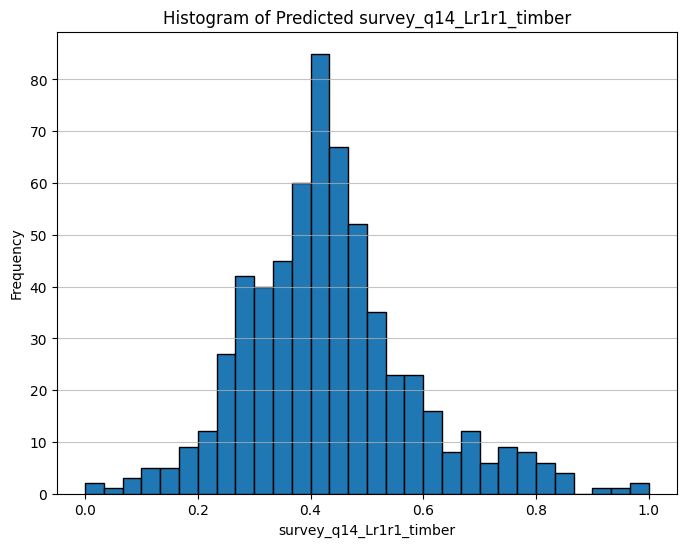

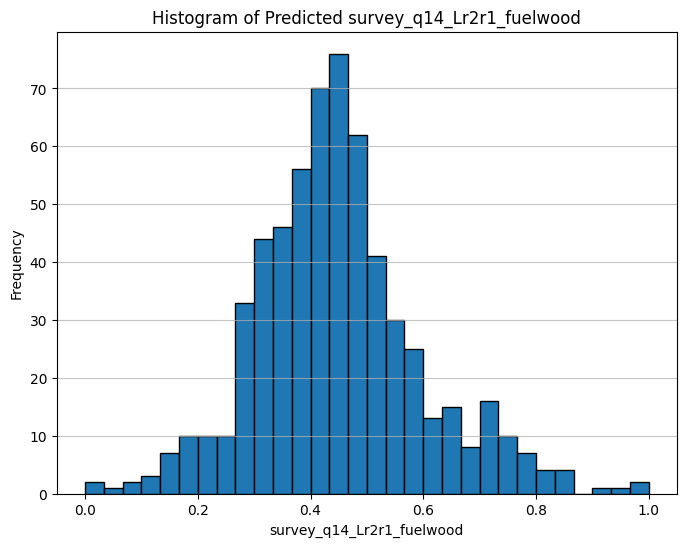

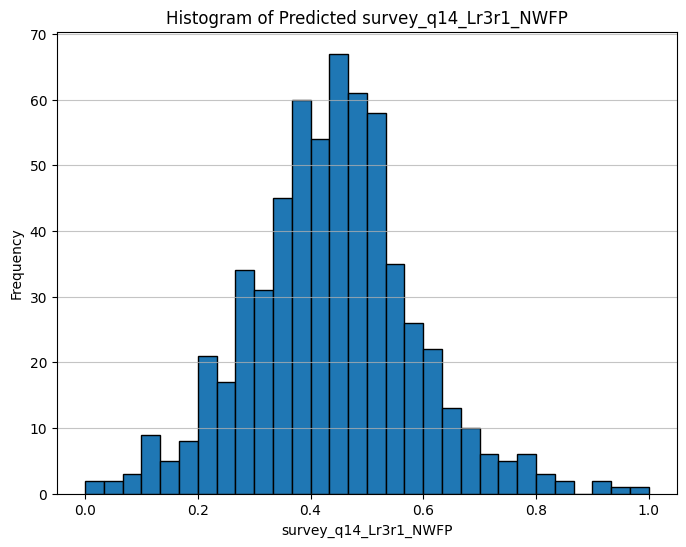

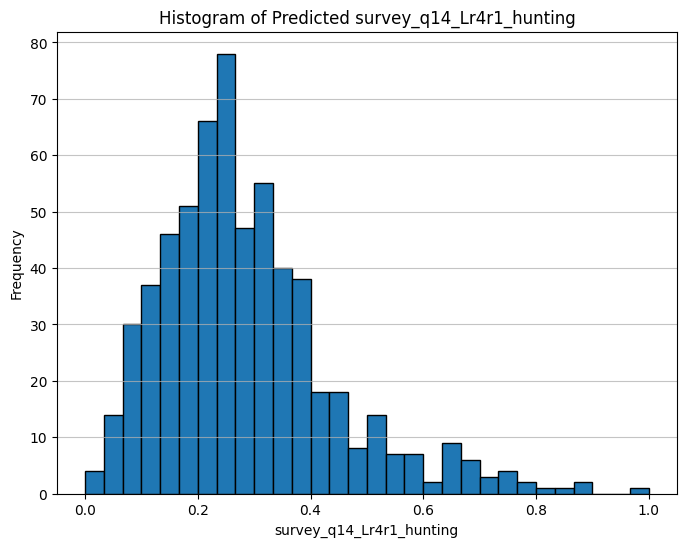

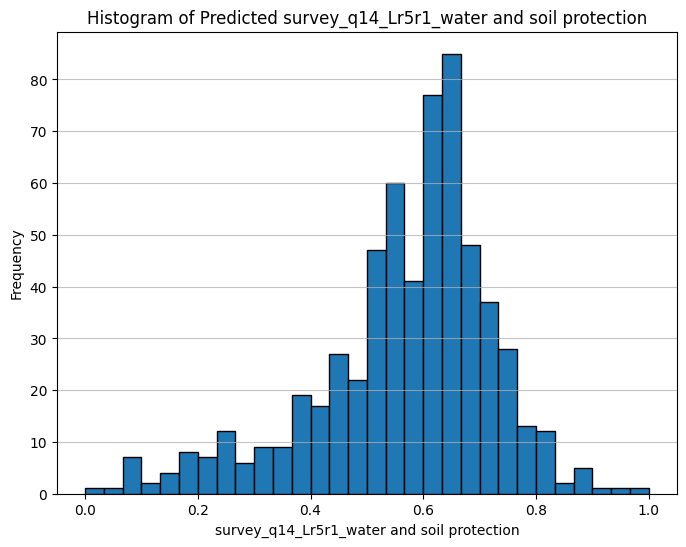

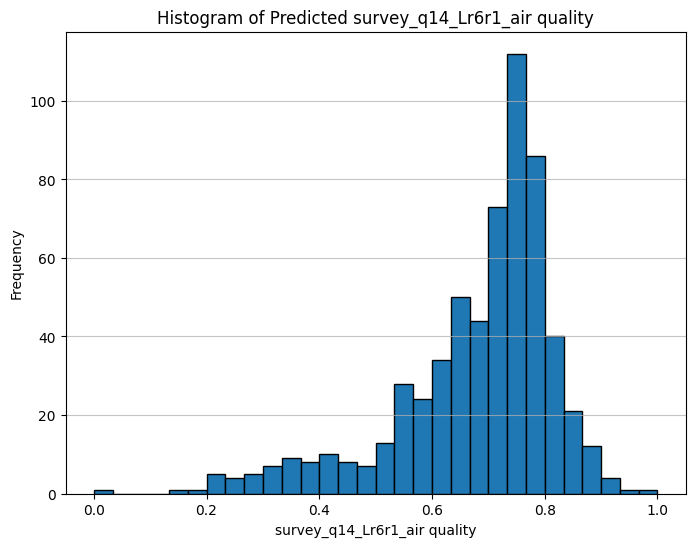

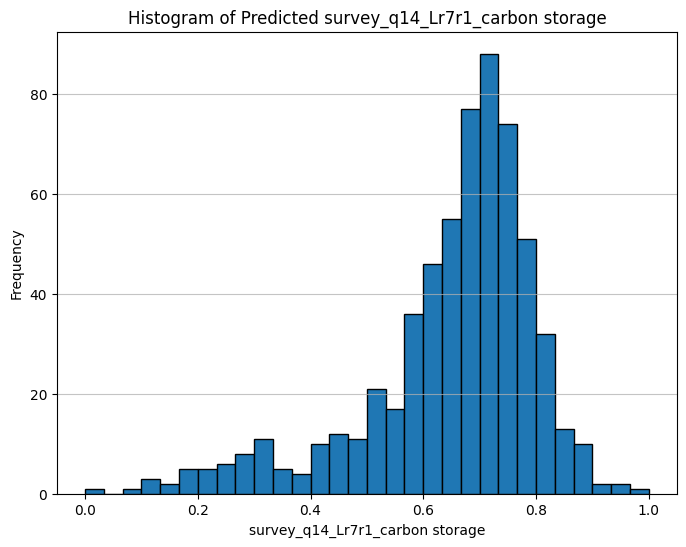

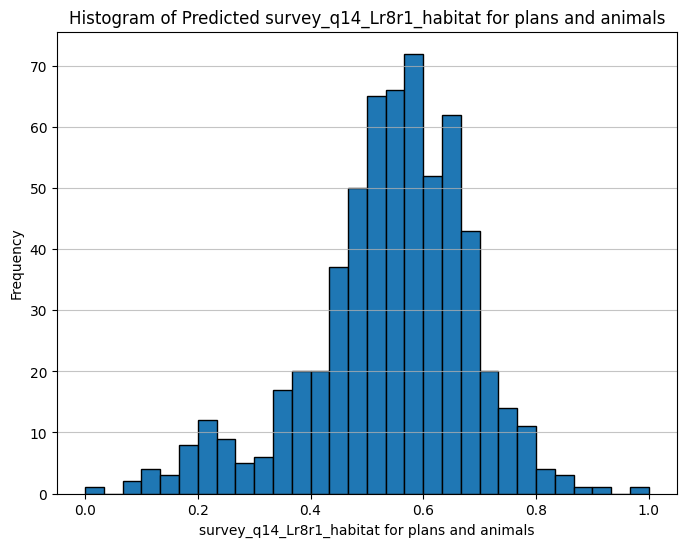

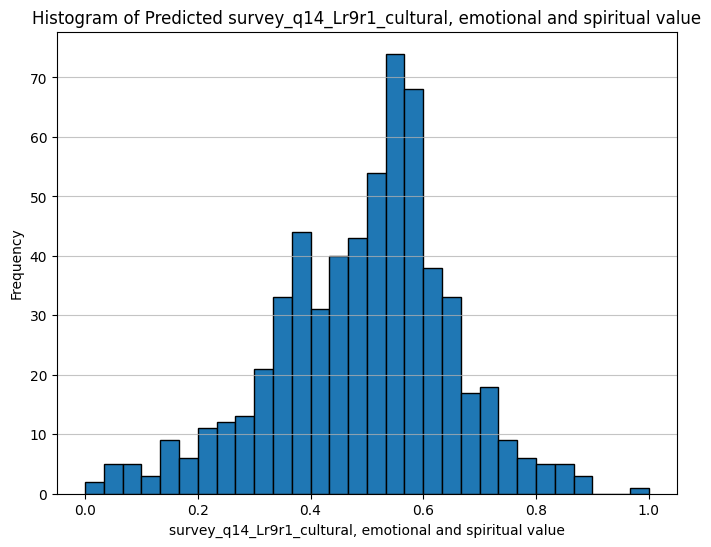

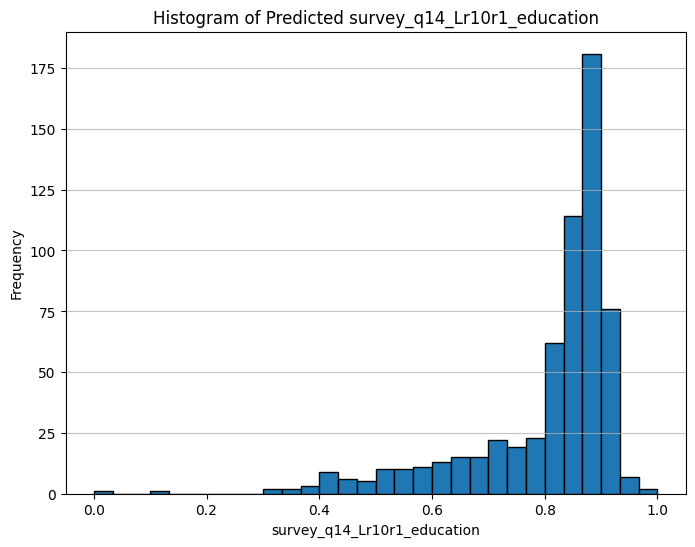

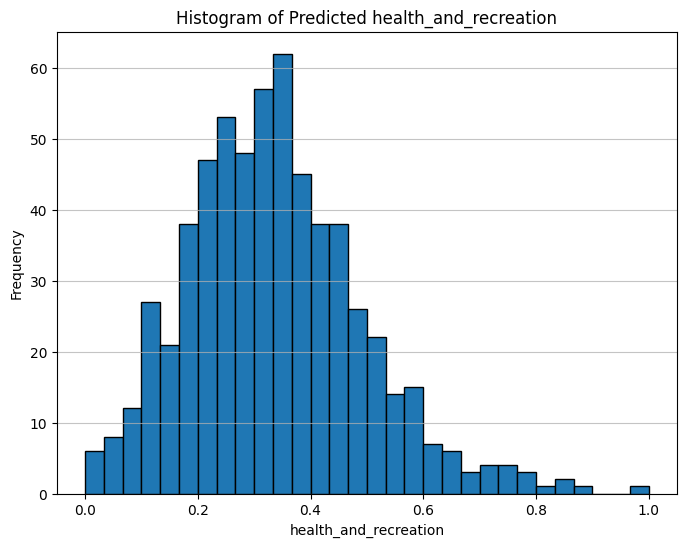

In [ ]:
# Make histograms of individual columns in predicted_df
for col in predicted_df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(predicted_df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of Predicted {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


# SUPPLY

In [ ]:
!pip install keras-tuner --upgrade
!pip install humanfriendly

In [ ]:
import os
import random
%pwd
import glob  # from os import chdir      from glob import glob
from math import*
import numpy as np   # from numpy import*   from numpy import sqrt
from numpy import load

import pandas as pd   # from pandas import*
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import save_model
from tensorflow.keras.models import model_from_json

from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.utils import plot_model
from IPython.display import Image

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from pickle import dump,load

import warnings
warnings.simplefilter("ignore", UserWarning)

import seaborn as sns

from io import StringIO

# import plotly.express as px  # for data visualization

import copy

import itertools

from datetime import datetime, date, time, timedelta

import decimal
decimal.getcontext().prec=6 # This changes float to decimals  - check if the rounding errors are now gone
print(decimal.getcontext())

# from keras_tuner.tuners import RandomSearch
# from keras_tuner.tuners import BayesianOptimization
# from keras_tuner.engine.hyperparameters import HyperParameters
from keras.utils import plot_model
from IPython.display import Image


np.random.seed(1)

os.chdir
# Set the WD
# %cd "/na/daily"     # This is for the datasets as the WD

pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})  #supress scientific notations

# import talos
import time
import datetime
from humanfriendly import format_timespan
import http.client
import urllib.parse
import pandas as pd   # from pandas import*
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
import sklearn
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from keras_tuner import BayesianOptimization, Objective, HyperParameters
import gc
import time
from humanfriendly import format_timespan
import http.client, urllib.parse
import decimal
decimal.getcontext().prec=6 # This changes float to decimals  - check if the rounding errors are now gone

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload")  # set WD

Context(prec=6, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])
Mounted at /content/drive


In [ ]:
# Load the SUPPLY data - winter/summer embeddings / change the load_data function based on these!!!
CH_data_supply= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/CH_SINC_foresters_supply_demand_GRID_max_WGS84.csv')
CH_data_supply = CH_data_supply.drop(columns=['Unnamed: 0'])
CH_data_supply = CH_data_supply.dropna(subset=['grid_abelow_biom']).reset_index(drop=True)
images_vectors_with_embeddings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Images/Supply/supply_embeddings_winter_summer.csv')
images_vectors_with_embeddings = images_vectors_with_embeddings.drop(columns=['Unnamed: 0'])
#add columns of images_vectors_with_embeddings to  CH_data_demand on the right side of CH_data_demand
CH_data_supply = pd.concat([CH_data_supply, images_vectors_with_embeddings], axis=1)
cols_to_drop_on_nan = [col for col in CH_data_supply.columns if 'embedding' in col.lower()]
CH_data_supply.dropna(subset=cols_to_drop_on_nan, inplace=True)

In [ ]:
# DEFINE THE DATA

# group variables
interval_independent_variables_list = [
    'grid_lon', 'grid_lat', 'grid_abelow_biom', 'grid_abelow_carbon',
    'grid_above_biomass', 'grid_above_carbon',  'grid_accessibility',
    'grid_density' , 'grid_et', 'grid_gsv', 'grid_increment',
    'grid_rainfall', 'grid_slope', 'grid_access2015',
    'grid_ruggedness', 'grid_ownership',
    'grid_abies', 'grid_alnus', 'grid_betula',
    'grid_broadleaves', 'grid_carpinus', 'grid_castanea', 'grid_conifers',
    'grid_eucalyptus', 'grid_fagus', 'grid_fraxinus', 'grid_larix',
    'grid_picea', 'grid_pines', 'grid_pinuspinaster',
    'grid_pinussylvestris', 'grid_populus', 'grid_pseudotsuga',
    'grid_quercusmisc', 'grid_quercusrobur', 'grid_robinia',
    'grid_Pathfinder_age_class', 'grid_Pathfinder_disturbance_size',
    'grid_Pathfinder_disturbance_freq', 'grid_Pathfinder_forest_mask',

]

# embeddings_independent_variables = CH_data_demand.iloc[:,-1024:].columns.tolist()
# length_of_embeddings = images_vectors_with_embeddings.shape[1] - 3
# embeddings_independent_variables = CH_data_demand.iloc[:,-length_of_embeddings:].columns.tolist() # CHANGE THIS TO GEOCLIP, SATCLIP length !!!!
embeddings_independent_variables = [col for col in CH_data_supply.columns if 'embedding' in col.lower()] # This option is for best pixel version # image_vector for winter_sumer; embedding for best pixel version

categorical_complex_independent_variables = [
    'grid_countries',
    'grid_dominant',
    'grid_Corine_2018',
    'grid_CLC_Nomenclature',
    'grid_CLC_Forest',
    'grid_Pathfinder_management',
    'grid_IIASA_management',
]

dummy_categorical_independent_variables = [
    'grid_bearing_cap',
    'grid_asites_forest',
    'grid_bsites_forest',
    'grid_csites_forest',
    'grid_Pathfinder_even_aged',
    'grid_Pathfinder_primary_forest'
]

dependent_variables = [
    'survey_Biomass_wood_supply',
    'survey_Biomass_energy_supply',
    'survey_Hunting_supply',
    'survey_NWFP_supply',
    'survey_Erosion_control_supply',
    'survey_Air_quality_supply',
    'survey_CC_mitigation_supply',
    'survey_Habitat_supply',
    'survey_Cultural_supply',
    'survey_Education_supply',
    'survey_Healthcare_supply'
]



In [ ]:
# FUNCTIONS

# Load the data

def load_data(dependent_variables):
    CH_data_supply= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/CH_SINC_foresters_supply_demand_GRID_max_WGS84.csv')
    CH_data_supply = CH_data_supply.drop(columns=['Unnamed: 0'])
    CH_data_supply = CH_data_supply.dropna(subset=['grid_abelow_biom']).reset_index(drop=True)
    images_vectors_with_embeddings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Images/Supply/supply_embeddings_winter_summer.csv')
    images_vectors_with_embeddings = images_vectors_with_embeddings.drop(columns=['Unnamed: 0'])
    #add columns of images_vectors_with_embeddings to  CH_data_demand on the right side of CH_data_demand
    CH_data_supply = pd.concat([CH_data_supply, images_vectors_with_embeddings], axis=1)
    cols_to_drop_on_nan = [col for col in CH_data_supply.columns if 'embedding' in col.lower()]
    CH_data_supply.dropna(subset=cols_to_drop_on_nan, inplace=True)
    # REPLACE UNTIL HERE BASED ON DATA INPUT
    # survey_x_coo and survey_y_coo coordinates are the same in both files - so it's OK!
    CH_data_supply = CH_data_supply.dropna(subset=['grid_bearing_cap']).reset_index(drop=True)
    CH_data_supply = CH_data_supply.dropna(subset=['grid_countries']) # also drop rows that are NA in countries, i.e. don't have country designation
    CH_data_supply = CH_data_supply.dropna(subset=['grid_dominant']).reset_index(drop=True) # these have NAs also in all columns related to tree species
    # Make variables for cutting criterion
    CH_data_supply['value_counts'] = CH_data_supply[dependent_variables].apply(count_values_in_row, axis=1)
    CH_data_supply['nan_count'] = CH_data_supply[dependent_variables].isnull().sum(axis=1)
    std_devs = CH_data_supply[dependent_variables].std(axis=1)
    std_devs_scaled = (std_devs - min(std_devs)) / (max(std_devs) - min(std_devs)) * 100
    CH_data_supply['std_devs_scaled'] = std_devs_scaled
    return CH_data_supply

def count_values_in_row(row):
  counts = {0: 0, 100: 0, 1: 0, 99:0 } # try also with 1 and 99
  for value in row:
    if value in counts:
      counts[value] += 1
  return sum(counts.values())


def prepare_data(CH_data_demand, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, dependent_variables):
    CH_data_demand_categorical = pd.DataFrame()
    # Iterate through the categorical columns
    for col in categorical_complex_independent_variables:
        # Perform one-hot encoding
        one_hot = pd.get_dummies(CH_data_demand[col], prefix=col, dtype=int)
        # Concatenate the one-hot encoded columns to the new DataFrame
        CH_data_demand_categorical = pd.concat([CH_data_demand_categorical, one_hot], axis=1)
    CH_data_demand_independent_categorical_variables = pd.concat([CH_data_demand_categorical, CH_data_demand[dummy_categorical_independent_variables]], axis=1)
    # Separate dependent variable
    CH_data_demand_dependent_variables = CH_data_demand[dependent_variables]
    CH_data_demand_embeddings_independent_variables = CH_data_demand[embeddings_independent_variables]



    # Separate independent interval variable
    CH_data_demand_interval_independent_variables = CH_data_demand[interval_independent_variables_list]
    interval_with_na = CH_data_demand_interval_independent_variables.columns[CH_data_demand_interval_independent_variables.isna().any()].tolist()
    dependent_with_na = CH_data_demand_dependent_variables.columns[CH_data_demand_dependent_variables.isna().any()].tolist()

    # with MICE, estimate the missing data  - here for interval independent
    imputer = IterativeImputer(random_state=100, max_iter=10)
    if len(interval_with_na) > 0:
        interval_with_na_data = CH_data_demand_interval_independent_variables[interval_with_na]
        imputer.fit(interval_with_na_data)
        df_imputed = imputer.transform(interval_with_na_data)
        CH_data_demand_interval_independent_variables[interval_with_na] = df_imputed

    # with MICE, estimate the missing data  - here for dependent
    imputer = IterativeImputer(random_state=100, max_iter=10)
    if len(dependent_with_na) > 0:
        dependent_with_na_data = CH_data_demand_dependent_variables[dependent_with_na]
        imputer.fit(dependent_with_na_data)
        df_imputed = imputer.transform(dependent_with_na_data)
        # Assign imputed values back to the original DataFrame using column names
        CH_data_demand_dependent_variables.loc[:, dependent_with_na] = df_imputed
    all_variables = pd.concat([CH_data_demand_interval_independent_variables, CH_data_demand_independent_categorical_variables , CH_data_demand_dependent_variables, CH_data_demand_embeddings_independent_variables], axis=1)
    train, temp = train_test_split(all_variables, test_size=0.2, random_state=42)  # 80% train, 20% temp.
    validate, test = train_test_split(temp, test_size=0.5, random_state=42)  # Split temp into 50% validate, 50% test
    X_train_interval = train[CH_data_demand_interval_independent_variables.columns]
    X_train_categorical = train[CH_data_demand_independent_categorical_variables.columns]
    X_train_embeddings = train[CH_data_demand_embeddings_independent_variables.columns]
    y_train = train[CH_data_demand_dependent_variables.columns]

    X_validate_interval = validate[CH_data_demand_interval_independent_variables.columns]
    X_validate_categorical = validate[CH_data_demand_independent_categorical_variables.columns]
    X_validate_embeddings = validate[CH_data_demand_embeddings_independent_variables.columns]
    y_validate = validate[CH_data_demand_dependent_variables.columns]

    X_test_interval = test[CH_data_demand_interval_independent_variables.columns]
    X_test_categorical = test[CH_data_demand_independent_categorical_variables.columns]
    X_test_embeddings = test[CH_data_demand_embeddings_independent_variables.columns]
    y_test = test[CH_data_demand_dependent_variables.columns]

    # Scale the data
    sc_dependent_train = MinMaxScaler(feature_range = (0, 1))
    dependent_train = sc_dependent_train.fit_transform(y_train)
    sc_dependent_validate = MinMaxScaler(feature_range = (0, 1))
    dependent_validate = sc_dependent_validate.fit_transform(y_validate)
    sc_dependent_test = MinMaxScaler(feature_range = (0, 1))
    dependent_test = sc_dependent_test.fit_transform(y_test)
    sc_interval_independent_train = MinMaxScaler(feature_range = (0, 1))
    interval_independent_train = sc_interval_independent_train.fit_transform(X_train_interval)
    sc_interval_independent_validate = MinMaxScaler(feature_range = (0, 1))
    interval_independent_validate = sc_interval_independent_validate.fit_transform(X_validate_interval)
    sc_interval_independent_test = MinMaxScaler(feature_range = (0, 1))
    interval_independent_test = sc_interval_independent_test.fit_transform(X_test_interval)
    sc_embeddings_train = MinMaxScaler(feature_range = (0, 1))
    embeddings_train = sc_embeddings_train.fit_transform(X_train_embeddings)
    sc_embeddings_validate = MinMaxScaler(feature_range = (0, 1))
    embeddings_validate = sc_embeddings_validate.fit_transform(X_validate_embeddings)
    sc_embeddings_test = MinMaxScaler(feature_range = (0, 1))
    embeddings_test = sc_embeddings_test.fit_transform(X_test_embeddings)
    independent_categorical_test = X_test_categorical.to_numpy()
    independent_categorical_train = X_train_categorical.to_numpy()
    independent_categorical_validate = X_validate_categorical.to_numpy()
    return interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test


def rescale_df(df):
    scaled_df = df.copy()
    for col in scaled_df.columns:
        min_val = scaled_df[col].min()
        max_val = scaled_df[col].max()
        # Avoid division by zero if all values in the column are the same
        if max_val - min_val != 0:
            scaled_df[col] = (scaled_df[col] - min_val) / (max_val - min_val)
        else:
            # If all values are the same, they will all be 0 after min_val subtraction,
            # which is already in the [0, 1] range.
            scaled_df[col] = 0
    return scaled_df


def send_push_final(total_elapsed_time, total_no_iterations):
    token = 'YYY'
    user = 'ZZZ'
    conn = http.client.HTTPSConnection("api.pushover.net:443")
    conn.request("POST", "/1/messages.json",
      urllib.parse.urlencode({
        "token": token,
        "user": user,
        "title": "Three layers training demand",
        "message": f"Total elapsed time = {total_elapsed_time} \n Total no of iterations = {total_no_iterations}",
      }), { "Content-type": "application/x-www-form-urlencoded" })
    conn.getresponse()


def build_model(hp):
    input_interval = Input(shape=(interval_independent_train.shape[1],), name='interval_input')
    input_categorical = Input(shape=(independent_categorical_train.shape[1],), name='categorical_input')
    input_embeddings = Input(shape=(embeddings_train.shape[1],), name='embeddings_input')


    # the first branch operates on the interval input
    x = Dense(units=hp.Int('dense_int_0', min_value=500, max_value=800, step=50), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_int_0', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_int_0')(input_interval)
    x = BatchNormalization(name='batch_norm_int_0')(x)
    x = Dropout(hp.Float('INT_DROP_0', min_value=0.1, max_value=0.5,step=0.1), name = 'INT_DROP_0')(x)
    x = Dense(units=hp.Int('dense_int_1', min_value=256, max_value=512, step=64), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_int_1', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_int_1')(x)
    x = BatchNormalization(name='batch_norm_int_1')(x)
    x = Dropout(hp.Float('INT_DROP_1', min_value=0.1, max_value=0.5,step=0.1), name = 'INT_DROP_1')(x)
    x = Model(inputs=input_interval, outputs=x)

    # the second branch opreates on the categorical input
    y = Dense(units=hp.Int('dense_cat_0', min_value=60, max_value=100, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_cat_0', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_cat_0')(input_categorical)
    y = BatchNormalization(name='batch_norm_cat_0')(y)
    y = Dropout(hp.Float('CAT_DROP_0', min_value=0.1, max_value=0.5,step=0.1), name = 'CAT_DROP_0')(y)
    y = Dense(units=hp.Int('dense_cat_1', min_value=10, max_value=50, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_cat_1', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_cat_1')(y)
    y = BatchNormalization(name='batch_norm_cat_1')(y)
    y = Dropout(hp.Float('CAT_DROP_1', min_value=0.1, max_value=0.5,step=0.1), name = 'CAT_DROP_1')(y)
    y = Model(inputs=input_categorical, outputs=y)

    # the third branch opreates on the embeddings input
    a = Dense(units=hp.Int('dense_emb_0', min_value=600, max_value=2000, step=100), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_emb_0', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_emb_0')(input_embeddings)
    a = BatchNormalization(name='batch_norm_emb_0')(a)
    a = Dropout(hp.Float('EMB_DROP_0', min_value=0.1, max_value=0.5,step=0.1), name = 'EMB_DROP_0')(a)
    a = Dense(units=hp.Int('dense_emb_1', min_value=200, max_value=600, step=100), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_emb_1', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_emb_1')(a)
    a = BatchNormalization(name='batch_norm_emb_1')(a)
    a = Dropout(hp.Float('EMB_DROP_1', min_value=0.1, max_value=0.5,step=0.1), name = 'EMB_DROP_1')(a)
    a = Dense(units=hp.Int('dense_emb_2', min_value=10, max_value=100, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_emb_2', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_emb_2')(a)
    a = BatchNormalization(name='batch_norm_emb_2')(a)
    a = Dropout(hp.Float('EMB_DROP_2', min_value=0.1, max_value=0.5,step=0.1), name = 'EMB_DROP_2')(a)
    a = Model(inputs=input_embeddings, outputs=a)

    combined = concatenate([x.output, y.output, a.output])

    z = Dense(units=hp.Int('dense_comb_0', min_value=100, max_value=200, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_comb_0', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_comb_0')(combined)
    z = BatchNormalization(name='batch_norm_comb_0')(z)
    z = Dropout(hp.Float('COMB_DROP_1', min_value=0.1, max_value=0.5,step=0.1), name = 'COMB_DROP_1')(z)
    z = Dense(units=hp.Int('dense_comb_1', min_value=60, max_value=100, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_comb_1', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_comb_1')(z)
    z = BatchNormalization(name='batch_norm_comb_1')(z)
    z = Dropout(hp.Float('COMB_DROP_2', min_value=0.1, max_value=0.5,step=0.1), name = 'COMB_DROP_2')(z)
    z = Dense(units=hp.Int('dense_comb_2', min_value=20, max_value=50, step=10), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_comb_2', min_value=1e-6, max_value=1e-3, sampling='LOG')), name = 'dense_comb_2')(z)
    z = BatchNormalization(name='batch_norm_comb_2')(z)
    z = Dropout(hp.Float('COMB_DROP_3', min_value=0.1, max_value=0.5,step=0.1), name = 'COMB_DROP_3')(z)
    z = Dense(dependent_test.shape[1], activation="linear", name = 'output_layer')(z)
    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=[x.input, y.input, a.input], outputs=z)
    model.compile(loss='mae', metrics=['mae'], optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')))
    return model


def model_and_predict_step_saving_models(interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test, verbose, tuning_path, batch_size, max_trials, num_epochs, dependent_variables):
    es = EarlyStopping(monitor="val_mae", min_delta=0.0001, patience=1, restore_best_weights=True)
    bayesian_opt_tuner = BayesianOptimization(build_model,objective=Objective("val_loss", direction="min"), max_trials=max_trials, executions_per_trial=1, directory=tuning_path, project_name='kerastuner_bayesian_poc', overwrite=True)
    bayesian_opt_tuner.search([interval_independent_train, independent_categorical_train, embeddings_train], dependent_train,epochs=num_epochs, validation_data = ([interval_independent_validate, independent_categorical_validate, embeddings_validate], dependent_validate), verbose=verbose, batch_size = batch_size, callbacks=[es])
    best_hps = bayesian_opt_tuner.get_best_hyperparameters(num_trials=1)[0]
    # bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
    # model = bayes_opt_model_best_model[0]
    # predicted = model.predict([interval_independent_test, independent_categorical_test, embeddings_test])
    tune_res = pd.DataFrame()
    for trial_id in bayesian_opt_tuner.oracle.trials:
        trial = bayesian_opt_tuner.oracle.trials[trial_id] #Get the trial object
        trial_state = trial.get_state()
        trial_hyperparameters = pd.Series(
            trial_state["hyperparameters"]["values"],
            index = trial_state["hyperparameters"]["values"].keys())
        trial_loss = pd.Series(trial_state["score"], index = ["val_loss"])
        trial_val_mae = pd.Series(trial_state['metrics']['metrics']['val_mae']['observations'][0]['value'], index=['val_mae'])
        trial_tune_res = pd.concat([trial_hyperparameters, trial_loss, trial_val_mae])
        trial_tune_res.name = trial_id
        tune_res = pd.concat([tune_res, trial_tune_res], axis = 1)
    tune_res = tune_res.T

    # here only check saving of mae values
    mean_mae_values = [] # Keep this as a list
    best_models = bayesian_opt_tuner.get_best_models(num_models=max_trials)
    for i, model in enumerate(best_models):
        model_save_path = os.path.join(tuning_path, f'best_model_{i}.keras')
        model.save(model_save_path)
        print(f"Best model {i} saved to {model_save_path}")
        predicted = model.predict([interval_independent_test, independent_categorical_test, embeddings_test])
        dependent_test_df = pd.DataFrame(dependent_test, columns=dependent_variables)
        predicted_df = pd.DataFrame(predicted, columns=dependent_variables)
        predicted_df = rescale_df(predicted_df)
        dependent_test_df = rescale_df(dependent_test_df)
        mae_per_column = {}
        for col in dependent_test_df.columns:
            mae = mean_absolute_error(dependent_test_df[col], predicted_df[col])
            mae_per_column[col] = mae
        mean_mae = sum(mae_per_column.values()) / len(mae_per_column)
        mean_mae_values.append(mean_mae) # Append to the list
    mean_mae_series = pd.Series(mean_mae_values)
    mean_mae_df = pd.DataFrame({'test_mae': mean_mae_values})
    tune_res = tune_res.reset_index(drop=True)
    mean_mae_df = mean_mae_df.reset_index(drop=True)
    results = pd.concat([tune_res, mean_mae_df], axis=1, ignore_index=False)
    # model.reset_states()
    return results

In [ ]:
# Up to here, we have defined the best version how to prepare the data, i.e. have
# defined best (i.e. lowest MEA on test data) values for criteria:  distances  value_counts  nan_counts  survey_durations_min  std_devs_scaled_min

In [ ]:
# now do V2 of HP tuning based on best data cut-off values
# Here we save the actual model and the values that describe it (HPs + loss + MAEs)
# this model here is the one that will be used to estimate the demand data for entire data-set of Europe's forests

In [ ]:
results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload/800_HP_Tuning_level_1_supply_embeddings.csv')
results = results.drop(columns=['Unnamed: 0'])

In [ ]:
# GENERAL HP TUNING

# distances = [600, 700, 800, 900, 1000]  # [600, 700, 800, 900, 1000] FULL LIST
value_counts = [5, 6] # [3, 4, 5, 6]
nan_counts = [5] # [3, 4, 5]
std_devs_scaled_min = [0, 4, 8]


total_start = time.time()

distance = 800 # CHANGE HERE # Tun on multiple platforms, each with different distance.

batch_size = 8
num_epochs = 200 # This is for the single increment of re-training
max_epochs = 120
verbose = 1
max_trials = 30 # MODIFY THIS

# results = pd.DataFrame()

for value_count in value_counts:
    for nan_count in nan_counts:
        for std_dev_scaled_min in std_devs_scaled_min:
            total_no_iterations = max_trials
            data_length = len(CH_data_supply)
            tuning_path = f"/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_supply_800m/{distance}_{value_count}_{nan_count}_{std_dev_scaled_min}"
            if not os.path.exists(tuning_path):
                os.makedirs(tuning_path)
            time.sleep(10) # Need to wait, on some platforms making new folders is slow. If it's not working, increase time
            row_info = pd.DataFrame({
                'distance': [distance] * max_trials,
                'value_count': [value_count] * max_trials,
                'nan_count': [nan_count] * max_trials,
                'std_dev_scaled_min': [std_dev_scaled_min] * max_trials,
                'data_length': [data_length] * max_trials
            })
            CH_data_supply = load_data(dependent_variables)
            CH_data_supply = CH_data_supply[CH_data_supply['distance'] <= distance] # keep only rows where CH_data_supply['distance'] is equal or les than XXX
            CH_data_supply = CH_data_supply[CH_data_supply['value_counts'] <= value_count]
            CH_data_supply = CH_data_supply[CH_data_supply['nan_count'] < nan_count] # No need to change this, there are few unanswered
            CH_data_supply = CH_data_supply[CH_data_supply['std_devs_scaled'] > std_dev_scaled_min] # No need to change this, there are few unanswered

            interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test = prepare_data(CH_data_supply, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, dependent_variables)

            results_one_loop  = model_and_predict_step_saving_models(interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test, verbose, tuning_path, batch_size, max_trials, num_epochs, dependent_variables)

            row_info = row_info.reset_index(drop=True)
            results_one_loop = results_one_loop.reset_index(drop=True)
            results_one_loop = pd.concat([row_info, results_one_loop], axis = 1, ignore_index=False)
            results_one_loop = results_one_loop.reset_index(drop=True)
            results = pd.concat([results, results_one_loop], axis = 0, ignore_index=True)
            results.to_csv('800_HP_Tuning_level_1_supply_embeddings.csv')

total_end = time.time()
total_elapsed_seconds = total_end - total_start
total_elapsed_time = format_timespan(total_elapsed_seconds)
send_push_final(total_elapsed_time, total_no_iterations)

In [ ]:
# END

In [ ]:
# There are many saved models for each combination of data pre-processing (i.e. different cut-off values)
# The CSV file that tracks the MAE values states which combination of cut-off values produces smallest MAE
# However, there are 30 models for each configuration, and it's not certain by index of the CSV file which model out of these is actually the best one
# To get this, cut from the CSV file row with best HP values and make it to a vertical table
# Keep columns that are just HP values, cut everything else. Cut also the learning rate info, as this is not preserved in the CSV file that tracks HP tuning
# Load the best HP parameters dataframe
best_HP_parameters = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload/best_HP_values_supply_step_1.csv')


# then compare these criteria against the HP of each model in the folder
# The code below will tell you the name of the file / which model is actually the best
# Save that one and delete all other ones

# Directory containing the Keras models
model_dir = "/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_supply_1000m/1000_3_3_8" # 1000 3 3 8

best_match_score = -1
best_match_filename = None

# Iterate through all files in the directory
for filename in os.listdir(model_dir):
    if filename.endswith(".keras"):  # Assuming models are saved in .keras format
        model_path = os.path.join(model_dir, filename)
        print(f"Checking model: {filename}")

        try:
            # Load the model
            loaded_model = tf.keras.models.load_model(model_path)

            # Check layer output shapes
            matching_layers = 0
            print("Layer shape comparison:")
            for index, row in best_HP_parameters.iterrows():
                layer_name_to_check = row['LAYER']
                # Ensure the 'VALUE' is treated as an integer for comparison with layer units
                expected_shape_value = int(row['VALUE'])

                if layer_name_to_check in [layer.name for layer in loaded_model.layers]:
                    layer = loaded_model.get_layer(layer_name_to_check)
                    # Check for Dense layers and their 'units' attribute
                    if isinstance(layer, tf.keras.layers.Dense):
                        actual_shape_value = layer.units
                        print(f"  - Layer '{layer_name_to_check}': Expected shape value = {expected_shape_value}, Actual shape value = {actual_shape_value}")
                        if actual_shape_value == expected_shape_value:
                            matching_layers += 1
                    # You can add checks for other layer types if needed (e.g., LSTM, GRU)
                    elif hasattr(layer, 'output_shape'):
                        # For layers with output_shape, you might need to adjust how you compare
                        # the shape based on the specific layer type and your 'VALUE' column.
                        # This example assumes 'VALUE' is meant to be the last dimension of the output shape for non-Dense layers
                        actual_output_shape = layer.output_shape
                        # Assuming output_shape is a tuple, and we compare the last dimension
                        if isinstance(actual_output_shape, tuple) and len(actual_output_shape) > 0:
                             actual_shape_value = actual_output_shape[-1]
                             print(f"  - Layer '{layer_name_to_check}': Expected shape value = {expected_shape_value}, Actual shape value = {actual_shape_value}")
                             if actual_shape_value == expected_shape_value:
                                matching_layers += 1
                        else:
                             print(f"  - Layer '{layer_name_to_check}': Could not determine comparable shape value.")
                    else:
                         print(f"  - Layer '{layer_name_to_check}': Does not have 'units' or 'output_shape' attribute for comparison.")

                else:
                    print(f"  - Layer '{layer_name_to_check}' not found in the model.")

            print(f"Number of layers with matching output shapes: {matching_layers}/{len(best_HP_parameters)}")
            print("-" * 30)

            # Update best match if current model has more matching layers
            if matching_layers > best_match_score:
                best_match_score = matching_layers
                best_match_filename = filename

        except Exception as e:
            print(f"Error loading or checking model {filename}: {e}")
            print("-" * 30)

# Print the name of the file that matches the criteria the most
if best_match_filename:
    print(f"The file that matches the criteria the most is: {best_match_filename} with {best_match_score} matching layers.")
else:
    print("No Keras models found in the specified directory.")

In [ ]:
CH_data_demand

,distance,grid_lon,grid_lat,grid_abelow_biom,grid_abelow_carbon,grid_above_biomass,grid_above_carbon,grid_accessibility,grid_density,grid_et,...,embedding_1017,embedding_1018,embedding_1019,embedding_1020,embedding_1021,embedding_1022,embedding_1023,value_counts,nan_count,std_devs_scaled
0,1000.00000,5060031.00000,5373235.00000,3532.00000,1697.00000,2989.00000,1422.00000,764.00000,0.00000,451.00000,...,0.01871,0.01418,0.00023,0.00005,0.00000,0.00126,0.00187,1,0,46.34469
1,1000.00000,5060031.00000,5373235.00000,3532.00000,1697.00000,2989.00000,1422.00000,764.00000,0.00000,451.00000,...,0.01871,0.01418,0.00023,0.00005,0.00000,0.00126,0.00187,6,0,36.60452
2,0.00000,5061031.00000,5373235.00000,5840.00000,2806.00000,4941.00000,2352.00000,760.00000,0.00000,443.00000,...,0.01041,0.01732,0.00083,0.00054,0.00000,0.00004,0.00055,1,0,46.34469
3,0.00000,5061031.00000,5373235.00000,5840.00000,2806.00000,4941.00000,2352.00000,760.00000,0.00000,443.00000,...,0.01041,0.01732,0.00083,0.00054,0.00000,0.00004,0.00055,6,0,36.60452
4,1000.00000,5128031.00000,5291235.00000,4181.00000,2009.00000,3538.00000,1684.00000,470.00000,0.00000,456.00000,...,0.00034,0.00459,0.00000,0.00000,0.00000,0.00000,0.00000,1,0,36.12178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1000.00000,5741031.00000,1474235.00000,2997.00000,1408.00000,2347.00000,1101.00000,92.00000,0.00000,1702.00000,...,0.01180,0.00226,0.00000,0.00000,0.00000,0.00096,0.00000,1,0,49.14189
9255,0.00000,5742031.00000,1474235.00000,5496.00000,2582.00000,4304.00000,2019.00000,100.00000,0.00000,1692.00000,...,0.00246,0.00217,0.00000,0.00000,0.00000,0.00100,0.00000,1,0,49.14189
9256,0.00000,5737031.00000,1473235.00000,2641.00000,1240.00000,2068.00000,970.00000,134.00000,0.00000,1733.00000,...,0.00019,0.00314,0.00000,0.00000,0.00000,0.00013,0.00000,0,0,57.67732
9257,0.00000,5569031.00000,1467235.00000,2284.00000,1073.00000,1788.00000,839.00000,104.00000,0.00000,1791.00000,...,0.00364,0.00525,0.00000,0.00000,0.00000,0.00104,0.00000,4,0,54.53211


In [ ]:
# SECOND STEP HP TUNING
# NOW WE KNOE THE 'BEST' VALUES ON HOW TO CUT THE INPUT DATA
# WE WILL JUST USE THIS ONE CONFIGURATION AND THEN INCREASE THE NUMBER OF TRIALS  # 1000 3 3 8

value_count = 3  # [3, 4, 5, 6]
nan_count = 3 # [3, 4, 5]
std_dev_scaled_min = 8


total_start = time.time()

distance = 1000 # NGE HERE # Tun on multiple platforms, each with different distance.

batch_size = 8
num_epochs = 200 # This is for the single increment of re-training
max_epochs = 120
verbose = 1
max_trials = 200 # MODIFY THIS

results = pd.DataFrame()

total_no_iterations = max_trials
lengths_CH_data_demand = pd.DataFrame()
data_length = len(CH_data_supply)
tuning_path = f"/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_supply_step_2/{distance}_{value_count}_{nan_count}_{std_dev_scaled_min}"
if not os.path.exists(tuning_path):
    os.makedirs(tuning_path)
time.sleep(10) # Need to wait, on some platforms making new folders is slow. If it's not working, increase time
row_info = pd.DataFrame({
    'distance': [distance] * max_trials,
    'value_count': [value_count] * max_trials,
    'nan_count': [nan_count] * max_trials,
    'std_dev_scaled_min': [std_dev_scaled_min] * max_trials,
    'data_length': [data_length] * max_trials
})
CH_data_demand = load_data(dependent_variables)
CH_data_demand = CH_data_demand[CH_data_demand['distance'] <= distance] # keep only rows where CH_data_demand['distance'] is equal or les than 750
CH_data_demand = CH_data_demand[CH_data_demand['value_counts'] <= value_count]
CH_data_demand = CH_data_demand[CH_data_demand['nan_count'] < nan_count] # No need to change this, there are few unanswered
CH_data_demand = CH_data_demand[CH_data_demand['std_devs_scaled'] > std_dev_scaled_min] # No need to change this, there are few unanswered
data_length = len(CH_data_demand)

interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test = prepare_data(CH_data_demand, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, dependent_variables)

results_one_loop  = model_and_predict_step_saving_models(interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test, verbose, tuning_path, batch_size, max_trials, num_epochs, dependent_variables)

row_info = row_info.reset_index(drop=True)
results_one_loop = results_one_loop.reset_index(drop=True)
results_one_loop = pd.concat([row_info, results_one_loop], axis = 1, ignore_index=False)
results_one_loop = results_one_loop.reset_index(drop=True)
results = pd.concat([results, results_one_loop], axis = 0, ignore_index=True)
results.to_csv('HP_Tuning_level_2_supply_embeddings.csv')

total_end = time.time()
total_elapsed_seconds = total_end - total_start
total_elapsed_time = format_timespan(total_elapsed_seconds)
send_push_final(total_elapsed_time, total_no_iterations)

In [ ]:
value_count = 3  # [3, 4, 5, 6]
nan_count = 3 # [3, 4, 5]
std_dev_scaled_min = 8


total_start = time.time()

distance = 1000 # NGE HERE # Tun on multiple platforms, each with different distance.

batch_size = 8
num_epochs = 200 # This is for the single increment of re-training
max_epochs = 120
verbose = 1
max_trials = 200 # MODIFY THIS

results = pd.DataFrame()

total_no_iterations = max_trials
lengths_CH_data_demand = pd.DataFrame()
data_length = len(CH_data_supply)
tuning_path = f"/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_supply_step_2/{distance}_{value_count}_{nan_count}_{std_dev_scaled_min}"
if not os.path.exists(tuning_path):
    os.makedirs(tuning_path)
time.sleep(10) # Need to wait, on some platforms making new folders is slow. If it's not working, increase time
row_info = pd.DataFrame({
    'distance': [distance] * max_trials,
    'value_count': [value_count] * max_trials,
    'nan_count': [nan_count] * max_trials,
    'std_dev_scaled_min': [std_dev_scaled_min] * max_trials,
    'data_length': [data_length] * max_trials
})
CH_data_demand = load_data(dependent_variables)
CH_data_demand = CH_data_demand[CH_data_demand['distance'] <= distance] # keep only rows where CH_data_demand['distance'] is equal or les than 750
CH_data_demand = CH_data_demand[CH_data_demand['value_counts'] <= value_count]
CH_data_demand = CH_data_demand[CH_data_demand['nan_count'] < nan_count] # No need to change this, there are few unanswered
CH_data_demand = CH_data_demand[CH_data_demand['std_devs_scaled'] > std_dev_scaled_min] # No need to change this, there are few unanswered
data_length = len(CH_data_demand)

interval_independent_train, independent_categorical_train, dependent_train, interval_independent_validate, independent_categorical_validate, dependent_validate, interval_independent_test, independent_categorical_test, dependent_test, sc_dependent_test, embeddings_train, embeddings_validate, embeddings_test = prepare_data(CH_data_demand, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, dependent_variables)


In [ ]:
# There are many saved models for each combination of data pre-processing (i.e. different cut-off values)
# The CSV file that tracks the MAE values states which combination of cut-off values produces smallest MAE
# However, there are 30 models for each configuration, and it's not certain by index of the CSV file which model out of these is actually the best one
# To get this, cut from the CSV file row with best HP values and make it to a vertical table
# Keep columns that are just HP values, cut everything else. Cut also the learning rate info, as this is not preserved in the CSV file that tracks HP tuning
# Load the best HP parameters dataframe
best_HP_parameters = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload/best_HP_values_supply_step_2.csv')


# then compare these criteria against the HP of each model in the folder
# The code below will tell you the name of the file / which model is actually the best
# Save that one and delete all other ones

# Directory containing the Keras models
model_dir = "/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Tuning_supply_step_2/1000_3_3_8" # 1000 3 3 8

best_match_score = -1
best_match_filename = None

# Iterate through all files in the directory
for filename in os.listdir(model_dir):
    if filename.endswith(".keras"):  # Assuming models are saved in .keras format
        model_path = os.path.join(model_dir, filename)
        print(f"Checking model: {filename}")

        try:
            # Load the model
            loaded_model = tf.keras.models.load_model(model_path)

            # Check layer output shapes
            matching_layers = 0
            print("Layer shape comparison:")
            for index, row in best_HP_parameters.iterrows():
                layer_name_to_check = row['LAYER']
                # Ensure the 'VALUE' is treated as an integer for comparison with layer units
                expected_shape_value = int(row['VALUE'])

                if layer_name_to_check in [layer.name for layer in loaded_model.layers]:
                    layer = loaded_model.get_layer(layer_name_to_check)
                    # Check for Dense layers and their 'units' attribute
                    if isinstance(layer, tf.keras.layers.Dense):
                        actual_shape_value = layer.units
                        print(f"  - Layer '{layer_name_to_check}': Expected shape value = {expected_shape_value}, Actual shape value = {actual_shape_value}")
                        if actual_shape_value == expected_shape_value:
                            matching_layers += 1
                    # You can add checks for other layer types if needed (e.g., LSTM, GRU)
                    elif hasattr(layer, 'output_shape'):
                        # For layers with output_shape, you might need to adjust how you compare
                        # the shape based on the specific layer type and your 'VALUE' column.
                        # This example assumes 'VALUE' is meant to be the last dimension of the output shape for non-Dense layers
                        actual_output_shape = layer.output_shape
                        # Assuming output_shape is a tuple, and we compare the last dimension
                        if isinstance(actual_output_shape, tuple) and len(actual_output_shape) > 0:
                             actual_shape_value = actual_output_shape[-1]
                             print(f"  - Layer '{layer_name_to_check}': Expected shape value = {expected_shape_value}, Actual shape value = {actual_shape_value}")
                             if actual_shape_value == expected_shape_value:
                                matching_layers += 1
                        else:
                             print(f"  - Layer '{layer_name_to_check}': Could not determine comparable shape value.")
                    else:
                         print(f"  - Layer '{layer_name_to_check}': Does not have 'units' or 'output_shape' attribute for comparison.")

                else:
                    print(f"  - Layer '{layer_name_to_check}' not found in the model.")

            print(f"Number of layers with matching output shapes: {matching_layers}/{len(best_HP_parameters)}")
            print("-" * 30)

            # Update best match if current model has more matching layers
            if matching_layers > best_match_score:
                best_match_score = matching_layers
                best_match_filename = filename

        except Exception as e:
            print(f"Error loading or checking model {filename}: {e}")
            print("-" * 30)

# Print the name of the file that matches the criteria the most
if best_match_filename:
    print(f"The file that matches the criteria the most is: {best_match_filename} with {best_match_score} matching layers.")
else:
    print("No Keras models found in the specified directory.")



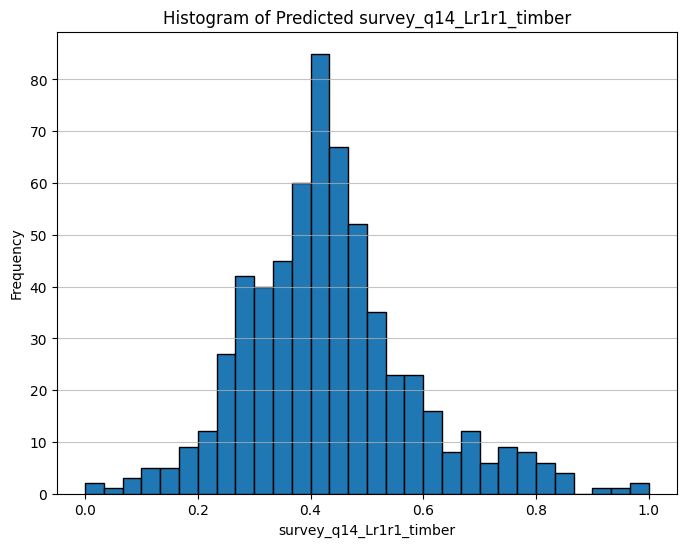

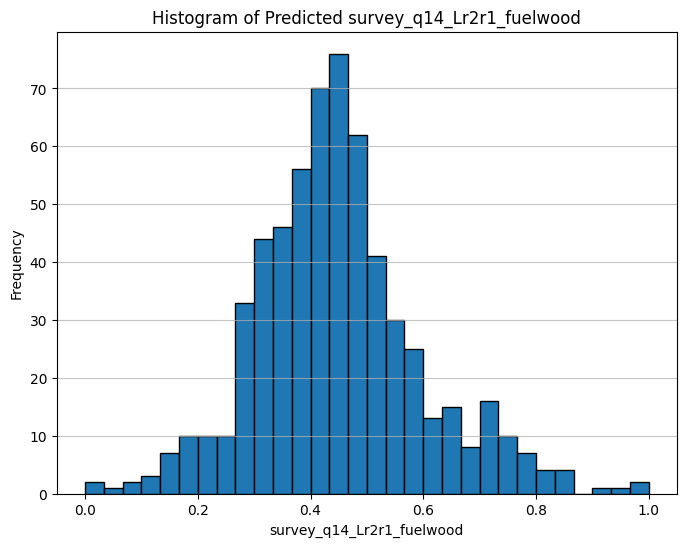

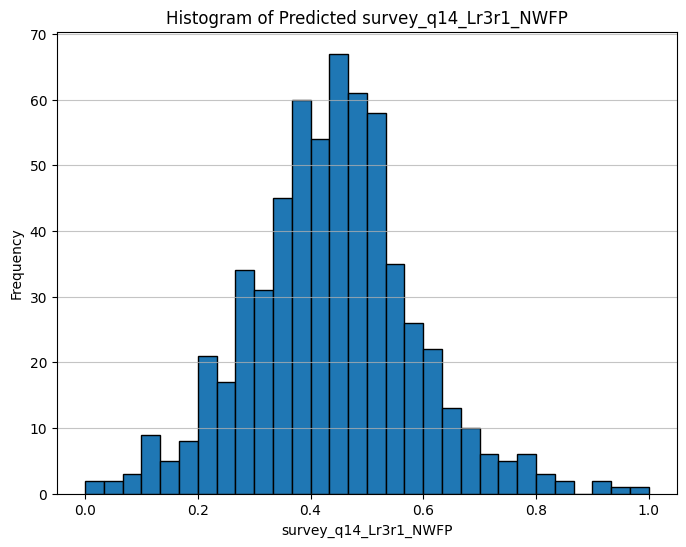

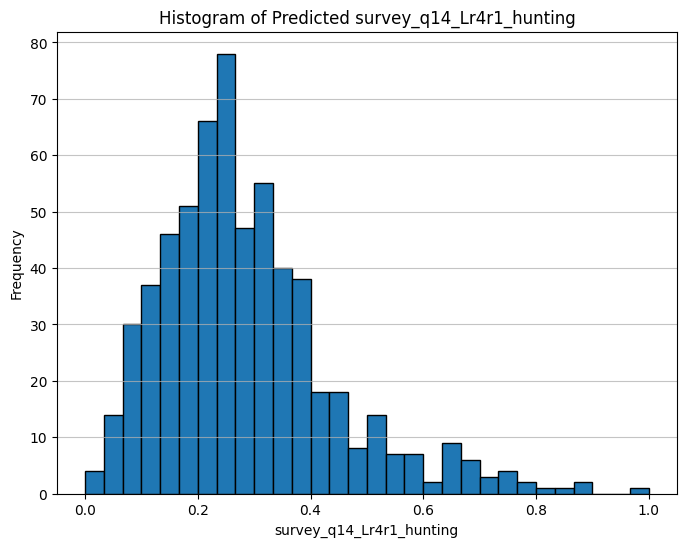

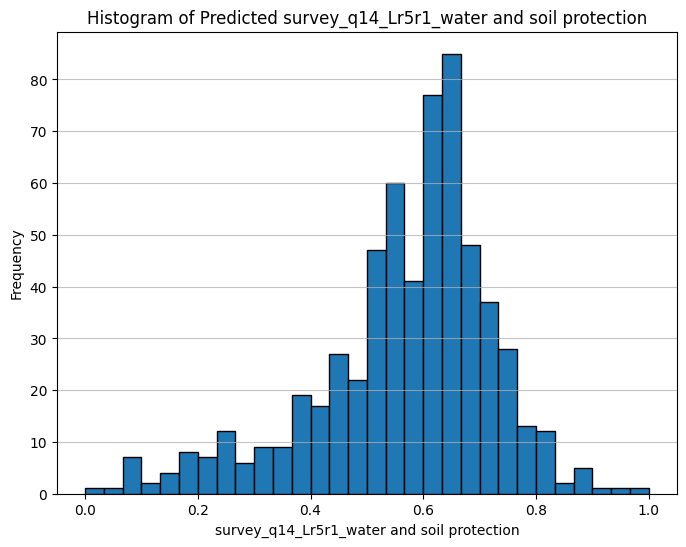

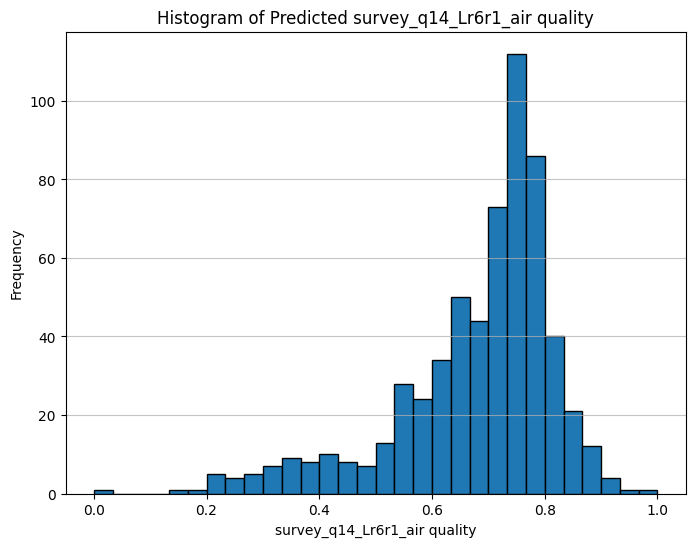

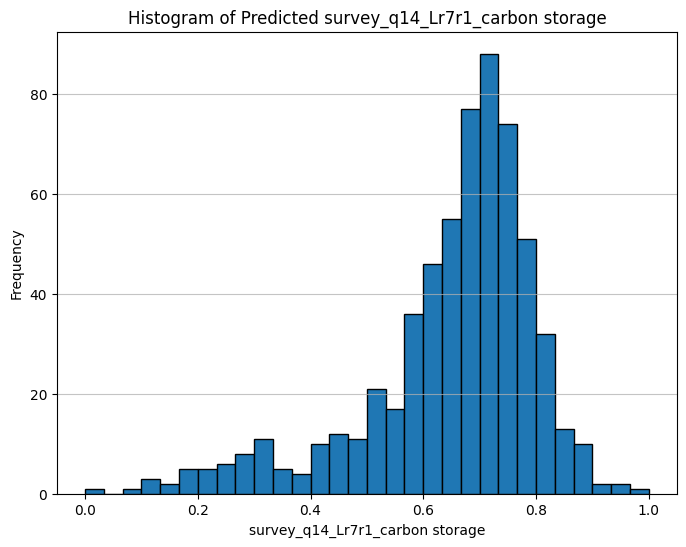

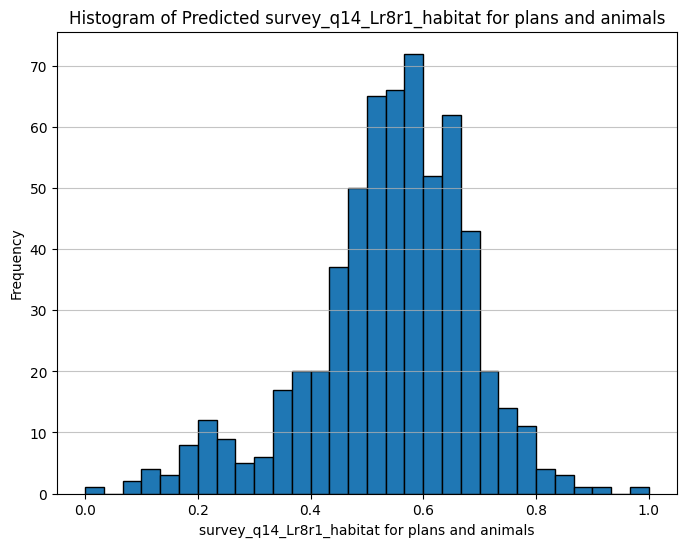

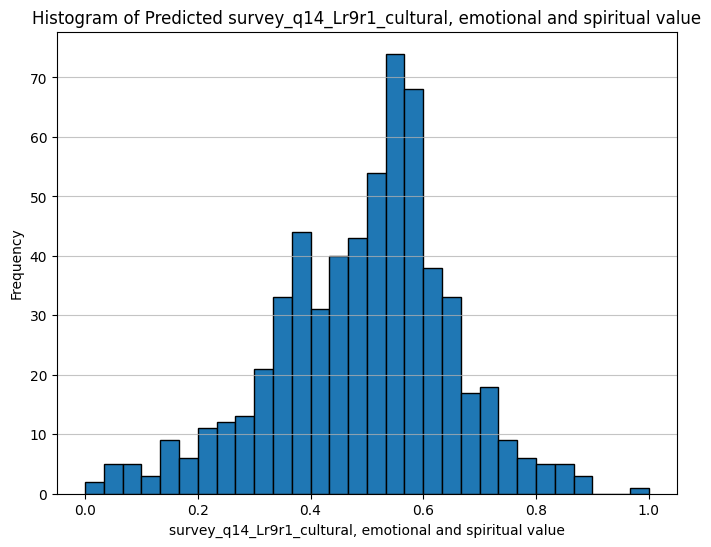

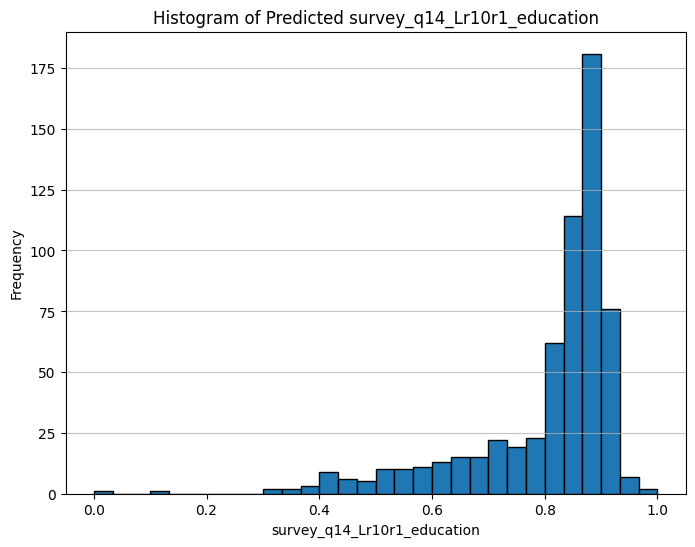

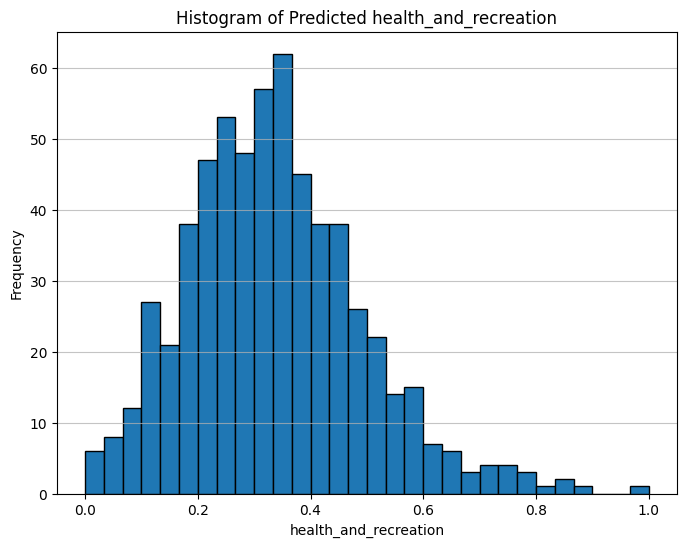

In [ ]:
# prompt: make histograms of individual columns in predicted_df

# Make histograms of individual columns in predicted_df
for col in predicted_df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(predicted_df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of Predicted {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


# making the predictions

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/full_data_corine_management_3_WGS84.csv')
full_data_embeddings_winter_summer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/full_data_embeddings_winter_summer.csv')
full_data_embeddings_winter_summer = full_data_embeddings_winter_summer.drop(columns=['Unnamed: 0'])
data = data.dropna(subset=['abelow_biom'])
data['Grid_Max_Index'] = data.index
data = data.reset_index(drop=True)
data_merged = pd.merge(data, full_data_embeddings_winter_summer, on='Grid_Max_Index', how='left')
data_merged = data_merged.dropna(subset=['embedding_1023'])

In [ ]:
# This might crash. If it does, then save the data_merged, restart and run it from there

In [ ]:
data_merged.to_csv('data_merged.csv')

In [ ]:
data_merged = pd.read_csv('full_data_WGS84_winter_summer.csv')
data_merged = data_merged.drop(columns=['Unnamed: 0'])

In [ ]:
# Full data has all possible categories in all categorical variables. This is not true for the supply and demand data
# Loading it normally does not work, as the input shape of the categorical data-set is different from what model expects
# So, we'd need to cut one-hot encoding version of the complex categorical variables to contain only the categories that were present in the supply / demand data.
# And we need to do this in the same version of the supply/demand data that was used in the best model (i.e. same criterion for cutting based on missing data)
# This cell has these values below, so it's OK to run it
# When you make your own training, save the data cut-off values and then use them to prepare the data for making the predictions

CH_data_supply= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/CH_SINC_foresters_supply_demand_GRID_max_WGS84.csv')
CH_data_supply = CH_data_supply.drop(columns=['Unnamed: 0'])
CH_data_supply = CH_data_supply.dropna(subset=['grid_abelow_biom']).reset_index(drop=True)
images_vectors_with_embeddings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Images/Supply/supply_embeddings_winter_summer.csv')
images_vectors_with_embeddings = images_vectors_with_embeddings.drop(columns=['Unnamed: 0'])
CH_data_supply = pd.concat([CH_data_supply, images_vectors_with_embeddings], axis=1)


interval_independent_variables_list = [
    'grid_lon', 'grid_lat', 'grid_abelow_biom', 'grid_abelow_carbon',
    'grid_above_biomass', 'grid_above_carbon',  'grid_accessibility',
    'grid_density' , 'grid_et', 'grid_gsv', 'grid_increment',
    'grid_rainfall', 'grid_slope', 'grid_access2015',
    'grid_ruggedness', 'grid_ownership',
    'grid_abies', 'grid_alnus', 'grid_betula',
    'grid_broadleaves', 'grid_carpinus', 'grid_castanea', 'grid_conifers',
    'grid_eucalyptus', 'grid_fagus', 'grid_fraxinus', 'grid_larix',
    'grid_picea', 'grid_pines', 'grid_pinuspinaster',
    'grid_pinussylvestris', 'grid_populus', 'grid_pseudotsuga',
    'grid_quercusmisc', 'grid_quercusrobur', 'grid_robinia',
    'grid_Pathfinder_age_class', 'grid_Pathfinder_disturbance_size',
    'grid_Pathfinder_disturbance_freq', 'grid_Pathfinder_forest_mask',

]

embeddings_independent_variables = [col for col in CH_data_supply.columns if 'embedding' in col.lower()] # This option is for best pixel version # image_vector for winter_sumer; embedding for best pixel version

categorical_complex_independent_variables = [
    'grid_countries',
    'grid_dominant',
    'grid_Corine_2018',
    'grid_CLC_Nomenclature',
    'grid_CLC_Forest',
    'grid_Pathfinder_management',
    'grid_IIASA_management',
]

dummy_categorical_independent_variables = [
    'grid_bearing_cap',
    'grid_asites_forest',
    'grid_bsites_forest',
    'grid_csites_forest',
    'grid_Pathfinder_even_aged',
    'grid_Pathfinder_primary_forest'
]

dependent_variables = [
    'survey_Biomass_wood_supply',
    'survey_Biomass_energy_supply',
    'survey_Hunting_supply',
    'survey_NWFP_supply',
    'survey_Erosion_control_supply',
    'survey_Air_quality_supply',
    'survey_CC_mitigation_supply',
    'survey_Habitat_supply',
    'survey_Cultural_supply',
    'survey_Education_supply',
    'survey_Healthcare_supply'
]


def count_values_in_row(row):
  counts = {0: 0, 100: 0, 1: 0, 99:0 } # try also with 1 and 99
  for value in row:
    if value in counts:
      counts[value] += 1
  return sum(counts.values())



cols_to_drop_on_nan = [col for col in CH_data_supply.columns if 'embedding' in col.lower()]
CH_data_supply.dropna(subset=cols_to_drop_on_nan, inplace=True)
CH_data_supply = CH_data_supply.dropna(subset=['grid_bearing_cap']).reset_index(drop=True)
CH_data_supply = CH_data_supply.dropna(subset=['grid_countries']) # also drop rows that are NA in countries, i.e. don't have country designation
CH_data_supply = CH_data_supply.dropna(subset=['grid_dominant']).reset_index(drop=True) # these have NAs also in all columns related to tree species
# Make variables for cutting criterion
CH_data_supply['value_counts'] = CH_data_supply[dependent_variables].apply(count_values_in_row, axis=1)
CH_data_supply['nan_count'] = CH_data_supply[dependent_variables].isnull().sum(axis=1)
std_devs = CH_data_supply[dependent_variables].std(axis=1)
std_devs_scaled = (std_devs - min(std_devs)) / (max(std_devs) - min(std_devs)) * 100
CH_data_supply['std_devs_scaled'] = std_devs_scaled


value_count = 3
nan_count = 3
std_dev_scaled_min = 8
distance = 1000

CH_data_supply = CH_data_supply[CH_data_supply['distance'] <= distance] # keep only rows where CH_data_demand['distance'] is equal or les than 750
CH_data_supply = CH_data_supply[CH_data_supply['value_counts'] <= value_count]
CH_data_supply = CH_data_supply[CH_data_supply['nan_count'] < nan_count] # No need to change this, there are few unanswered
CH_data_supply = CH_data_supply[CH_data_supply['std_devs_scaled'] > std_dev_scaled_min] # No need to change this, there are few unanswered

CH_data_supply_categorical = pd.DataFrame()
# Iterate through the categorical columns
for col in categorical_complex_independent_variables:
    # Perform one-hot encoding
    one_hot = pd.get_dummies(CH_data_supply[col], prefix=col, dtype=int)
    # Concatenate the one-hot encoded columns to the new DataFrame
    CH_data_supply_categorical = pd.concat([CH_data_supply_categorical, one_hot], axis=1)
CH_data_supply_independent_categorical_variables = pd.concat([CH_data_supply_categorical, CH_data_supply[dummy_categorical_independent_variables]], axis=1)

supply_categories_columns = CH_data_supply_independent_categorical_variables.columns
categorical_columns_to_keep = [col.replace('grid_', '') for col in supply_categories_columns] # this is what we want

In [ ]:
interval_independent_variables_list = [
    'lon', 'lat', 'abelow_biom', 'abelow_carbon',
    'above_biomass', 'above_carbon',  'accessibility',
    'density' , 'et', 'gsv', 'increment',
    'rainfall', 'slope', 'access2015',
    'ruggedness', 'ownership',
    'abies', 'alnus', 'betula',
    'broadleaves', 'carpinus', 'castanea', 'conifers',
    'eucalyptus', 'fagus', 'fraxinus', 'larix',
    'picea', 'pines', 'pinuspinaster',
    'pinussylvestris', 'populus', 'pseudotsuga',
    'quercusmisc', 'quercusrobur', 'robinia',
    'Pathfinder_age_class', 'Pathfinder_disturbance_size',
    'Pathfinder_disturbance_freq', 'Pathfinder_forest_mask',

]

# embeddings_independent_variables = CH_data_demand.iloc[:,-1024:].columns.tolist()
# length_of_embeddings = images_vectors_with_embeddings.shape[1] - 3
# embeddings_independent_variables = CH_data_demand.iloc[:,-length_of_embeddings:].columns.tolist() # CHANGE THIS TO GEOCLIP, SATCLIP length !!!!
embeddings_independent_variables = [col for col in data_merged.columns if 'embedding' in col.lower()] # This option is for best pixel version # image_vector for winter_sumer; embedding for best pixel version

categorical_complex_independent_variables = [
    'countries',
    'dominant',
    'Corine_2018',
    'CLC_Nomenclature',
    'CLC_Forest',
    'Pathfinder_management',
    'IIASA_management',
]

dummy_categorical_independent_variables = [
    'bearing_cap',
    'asites_forest',
    'bsites_forest',
    'csites_forest',
    'Pathfinder_even_aged',
    'Pathfinder_primary_forest'
]

supply_variables = [
    'supply_biomass_wood',
    'supply_biomass_energy',
    'supply_hunting_game',
    'supply_NWFP',
    'supply_erosion_control',
    'supply_air_quality',
    'supply_CC_mitigation',
    'supply_habitat',
    'supply_cultural',
    'supply_education',
    'supply_healthcare'
]

demand_variables = [
    'demand_biomass_wood',
    'demand_biomass_energy',
    'demand_hunting_game',
    'demand_NWFP',
    'demand_erosion_control',
    'demand_air_quality',
    'demand_CC_mitigation',
    'demand_habitat',
    'demand_cultural',
    'demand_education',
    'demand_healthcare'
]

In [ ]:
def prepare_data_2(CH_data_demand, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, categorical_columns_to_keep):
    CH_data_demand_categorical = pd.DataFrame()
    # Iterate through the categorical columns
    for col in categorical_complex_independent_variables:
        # Perform one-hot encoding
        one_hot = pd.get_dummies(CH_data_demand[col], prefix=col, dtype=int)
        # Concatenate the one-hot encoded columns to the new DataFrame
        CH_data_demand_categorical = pd.concat([CH_data_demand_categorical, one_hot], axis=1)
    CH_data_demand_independent_categorical_variables = pd.concat([CH_data_demand_categorical, CH_data_demand[dummy_categorical_independent_variables]], axis=1)
    # Keep only columns that have the same names as columns in supply_categories_columns_cleaned
    CH_data_demand_independent_categorical_variables = CH_data_demand_independent_categorical_variables[categorical_columns_to_keep]
    CH_data_demand_embeddings_independent_variables = CH_data_demand[embeddings_independent_variables]



    # Separate independent interval variable
    CH_data_demand_interval_independent_variables = CH_data_demand[interval_independent_variables_list]
    interval_with_na = CH_data_demand_interval_independent_variables.columns[CH_data_demand_interval_independent_variables.isna().any()].tolist()

    # with MICE, estimate the missing data  - here for interval independent
    imputer = IterativeImputer(random_state=100, max_iter=10)
    if len(interval_with_na) > 0:
        interval_with_na_data = CH_data_demand_interval_independent_variables[interval_with_na]
        imputer.fit(interval_with_na_data)
        df_imputed = imputer.transform(interval_with_na_data)
        CH_data_demand_interval_independent_variables[interval_with_na] = df_imputed

    # with MICE, estimate the missing data  - here for dependent
    imputer = IterativeImputer(random_state=100, max_iter=10)
    all_variables = pd.concat([CH_data_demand_interval_independent_variables, CH_data_demand_independent_categorical_variables , CH_data_demand_embeddings_independent_variables], axis=1)
    interval = all_variables[CH_data_demand_interval_independent_variables.columns]
    categorical = all_variables[CH_data_demand_independent_categorical_variables.columns]
    embeddings = all_variables[CH_data_demand_embeddings_independent_variables.columns]


    # Scale the data
    sc_interval_independent = MinMaxScaler(feature_range = (0, 1))
    interval_scaled = sc_interval_independent.fit_transform(interval)
    sc_embeddings = MinMaxScaler(feature_range = (0, 1))
    embeddings_scaled = sc_embeddings.fit_transform(embeddings)
    categorical = categorical.to_numpy()
    return interval_scaled, categorical, embeddings_scaled

def rescale_df(df):
    scaled_df = df.copy()
    for col in scaled_df.columns:
        min_val = scaled_df[col].min()
        max_val = scaled_df[col].max()
        # Avoid division by zero if all values in the column are the same
        if max_val - min_val != 0:
            scaled_df[col] = (scaled_df[col] - min_val) / (max_val - min_val)
        else:
            # If all values are the same, they will all be 0 after min_val subtraction,
            # which is already in the [0, 1] range.
            scaled_df[col] = 0
    return scaled_df

def count_values_in_row(row):
  counts = {0: 0, 100: 0, 1: 0, 99:0 } # try also with 1 and 99
  for value in row:
    if value in counts:
      counts[value] += 1
  return sum(counts.values())

In [ ]:
interval_scaled, categorical, embeddings_scaled = prepare_data_2(data_merged, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, categorical_columns_to_keep)

/tmp/ipython-input-12-2369248028.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CH_data_demand_interval_independent_variables[interval_with_na] = df_imputed


In [ ]:
model_supply = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload/Final/best_model_supply_step_2_winter_summer.keras')

In [ ]:
model_supply.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ embeddings_input    │ (None, 1024)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_emb_0 (Dense) │ (None, 800)       │    820,000 │ embeddings_input… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_norm_emb_0    │ (None, 800)       │      3,200 │ dense_emb_0[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interval_input      │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ categorical_input   │ (None, 108)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ EMB_DROP_0          │ (None, 800)       │          0 │ batch_norm_emb_0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_int_0 (Dense) │ (None, 800)       │     32,800 │ interval_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_cat_0 (Dense) │ (None, 80)        │      8,720 │ categorical_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_emb_1 (Dense) │ (None, 600)       │    480,600 │ EMB_DROP_0[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_norm_int_0    │ (None, 800)       │      3,200 │ dense_int_0[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_norm_cat_0    │ (None, 80)        │        320 │ dense_cat_0[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_norm_emb_1    │ (None, 600)       │      2,400 │ dense_emb_1[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INT_DROP_0          │ (None, 800)       │          0 │ batch_norm_int_0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CAT_DROP_0          │ (None, 80)        │          0 │ batch_norm_cat_0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ EMB_DROP_1          │ (None, 600)       │          0 │ batch_norm_emb_1… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_int_1 (Dense) │ (None, 256)       │    205,056 │ INT_DROP_0[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_cat_1 (Dense) │ (None, 30)        │      2,430 │ CAT_DROP_0[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_emb_2 (Dense) │ (None, 80)        │     48,080 │ EMB_DROP_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_norm_int_1    │ (None, 256)       │      1,024 │ dense_int_1[0][0] │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 5,009,681 (19.11 MB)

 Trainable params: 1,667,969 (6.36 MB)

 Non-trainable params: 5,772 (22.55 KB)

 Optimizer params: 3,335,940 (12.73 MB)

In [ ]:
plot_model(model_supply, show_shapes=True)

In [ ]:
predicted_supply = model_supply.predict([interval_scaled, categorical, embeddings_scaled])
predicted_df = pd.DataFrame(predicted_supply, columns=supply_variables)
predicted_df = rescale_df(predicted_df)
predicted_df['lon_WGS84'] = data_merged['lon_WGS84_x']
predicted_df['lat_WGS84'] = data_merged['lat_WGS84_x']
predicted_df['Grid_Max_Index'] = data_merged['Grid_Max_Index']
cols = ['lon_WGS84', 'lat_WGS84', 'Grid_Max_Index'] + [col for col in predicted_df.columns if col not in ['lon_WGS84', 'lat_WGS84', 'Grid_Max_Index']]
predicted_df = predicted_df[cols]
predicted_df.to_csv('supply_predicted_full.csv')

46408/46408 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step


In [ ]:
# Now repeat for demand

In [ ]:
# Cut the categorical data to one hot encoding of categories used in the demand data - version that was used in the best model

In [ ]:
CH_data_demand = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/CH_data_demand_14_4_GRID_max.csv')
CH_data_demand = CH_data_demand.drop(columns=['Unnamed: 0'])
CH_data_demand['survey_duration'] = pd.to_timedelta(CH_data_demand['survey_duration'])
CH_data_demand = CH_data_demand.dropna(subset=['grid_abelow_biom']).reset_index(drop=True)
images_vectors_with_embeddings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Images/Demand/demand_winter_summer_embeddings_Grid_Max.csv')
images_vectors_with_embeddings = images_vectors_with_embeddings.drop(columns=['Unnamed: 0'])
CH_data_demand = pd.concat([CH_data_demand, images_vectors_with_embeddings], axis=1)

interval_independent_variables_list = [
    'grid_lon', 'grid_lat', 'grid_abelow_biom', 'grid_abelow_carbon',
    'grid_above_biomass', 'grid_above_carbon',  'grid_accessibility',
    'grid_density' , 'grid_et', 'grid_gsv', 'grid_increment',
    'grid_rainfall', 'grid_slope', 'grid_access2015',
    'grid_ruggedness', 'grid_ownership',
    'grid_abies', 'grid_alnus', 'grid_betula',
    'grid_broadleaves', 'grid_carpinus', 'grid_castanea', 'grid_conifers',
    'grid_eucalyptus', 'grid_fagus', 'grid_fraxinus', 'grid_larix',
    'grid_picea', 'grid_pines', 'grid_pinuspinaster',
    'grid_pinussylvestris', 'grid_populus', 'grid_pseudotsuga',
    'grid_quercusmisc', 'grid_quercusrobur', 'grid_robinia',
    'grid_Pathfinder_age_class', 'grid_Pathfinder_disturbance_size',
    'grid_Pathfinder_disturbance_freq', 'grid_Pathfinder_forest_mask',

]

# embeddings_independent_variables = CH_data_demand.iloc[:,-1024:].columns.tolist()
# length_of_embeddings = images_vectors_with_embeddings.shape[1] - 3
# embeddings_independent_variables = CH_data_demand.iloc[:,-length_of_embeddings:].columns.tolist() # CHANGE THIS TO GEOCLIP, SATCLIP length !!!!
embeddings_independent_variables = [col for col in CH_data_demand.columns if 'image_vector' in col.lower()] # This option is for best pixel version # image_vector for winter_sumer; embedding for best pixel version

categorical_complex_independent_variables = [
    'grid_countries',
    'grid_dominant',
    'grid_Corine_2018',
    'grid_CLC_Nomenclature',
    'grid_CLC_Forest',
    'grid_Pathfinder_management',
    'grid_IIASA_management',
]

dummy_categorical_independent_variables = [
    'grid_bearing_cap',
    'grid_asites_forest',
    'grid_bsites_forest',
    'grid_csites_forest',
    'grid_Pathfinder_even_aged',
    'grid_Pathfinder_primary_forest'
]

dependent_variables = [
    'survey_q14_Lr1r1_timber',
    'survey_q14_Lr2r1_fuelwood',
    'survey_q14_Lr3r1_NWFP',
    'survey_q14_Lr4r1_hunting',
    'survey_q14_Lr5r1_water and soil protection',
    'survey_q14_Lr6r1_air quality',
    'survey_q14_Lr7r1_carbon storage',
    'survey_q14_Lr8r1_habitat for plans and animals',
    'survey_q14_Lr9r1_cultural, emotional and spiritual value',
    'survey_q14_Lr10r1_education',
    'health_and_recreation'
]



cols_to_drop_on_nan = [col for col in CH_data_demand.columns if 'image_vector' in col.lower()]
CH_data_demand.dropna(subset=cols_to_drop_on_nan, inplace=True)
CH_data_demand = CH_data_demand.dropna(subset=['grid_bearing_cap']).reset_index(drop=True)
CH_data_demand = CH_data_demand.dropna(subset=['grid_countries']) # also drop rows that are NA in countries, i.e. don't have country designation
CH_data_demand = CH_data_demand.dropna(subset=['grid_dominant']).reset_index(drop=True) # these have NAs also in all columns related to tree species
CH_data_demand['health_and_recreation'] = CH_data_demand[['survey_q14_Lr12r1_health and wellbeing', 'survey_q14_Lr11r1_recreation']].mean(axis=1)
CH_data_demand = CH_data_demand.drop(columns=['survey_q14_Lr11r1_recreation', 'survey_q14_Lr12r1_health and wellbeing'])
# Make variables for cutting criterion
CH_data_demand['value_counts'] = CH_data_demand[dependent_variables].apply(count_values_in_row, axis=1)
CH_data_demand['nan_count'] = CH_data_demand[dependent_variables].isnull().sum(axis=1)
std_devs = CH_data_demand[dependent_variables].std(axis=1)
std_devs_scaled = (std_devs - min(std_devs)) / (max(std_devs) - min(std_devs)) * 100
CH_data_demand['std_devs_scaled'] = std_devs_scaled

value_count = 3
nan_count = 3
survey_duration_min = pd.Timedelta(minutes=8)
std_dev_scaled_min = 8
distance = 1000

CH_data_demand = CH_data_demand[CH_data_demand['distance'] <= distance] # keep only rows where CH_data_demand['distance'] is equal or les than 750
CH_data_demand = CH_data_demand[CH_data_demand['value_counts'] <= value_count]
CH_data_demand = CH_data_demand[CH_data_demand['nan_count'] < nan_count] # No need to change this, there are few unanswered
CH_data_demand = CH_data_demand[CH_data_demand['survey_duration'] >= survey_duration_min] # from CH_data_demand, remove rows where CH_data_demand['duration'] less than X minutes
CH_data_demand = CH_data_demand[CH_data_demand['std_devs_scaled'] > std_dev_scaled_min] # No need to change this, there are few unanswered

CH_data_demand_categorical = pd.DataFrame()
# Iterate through the categorical columns
for col in categorical_complex_independent_variables:
    # Perform one-hot encoding
    one_hot = pd.get_dummies(CH_data_demand[col], prefix=col, dtype=int)
    # Concatenate the one-hot encoded columns to the new DataFrame
    CH_data_demand_categorical = pd.concat([CH_data_demand_categorical, one_hot], axis=1)
CH_data_demand_independent_categorical_variables = pd.concat([CH_data_demand_categorical, CH_data_demand[dummy_categorical_independent_variables]], axis=1)

demand_categories_columns = CH_data_demand_independent_categorical_variables.columns
categorical_columns_to_keep = [col.replace('grid_', '') for col in demand_categories_columns] # this is what we want

In [ ]:
len(categorical_columns_to_keep)

107

In [ ]:
interval_scaled, categorical, embeddings_scaled = prepare_data_2(data_merged, interval_independent_variables_list, categorical_complex_independent_variables, dummy_categorical_independent_variables, embeddings_independent_variables, categorical_columns_to_keep)

/tmp/ipython-input-11-2369248028.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CH_data_demand_interval_independent_variables[interval_with_na] = df_imputed


In [ ]:
model_demand = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/For_upload/Final/best_model_demand_step_2_winter_summer.keras')

In [ ]:
model_demand.summary()

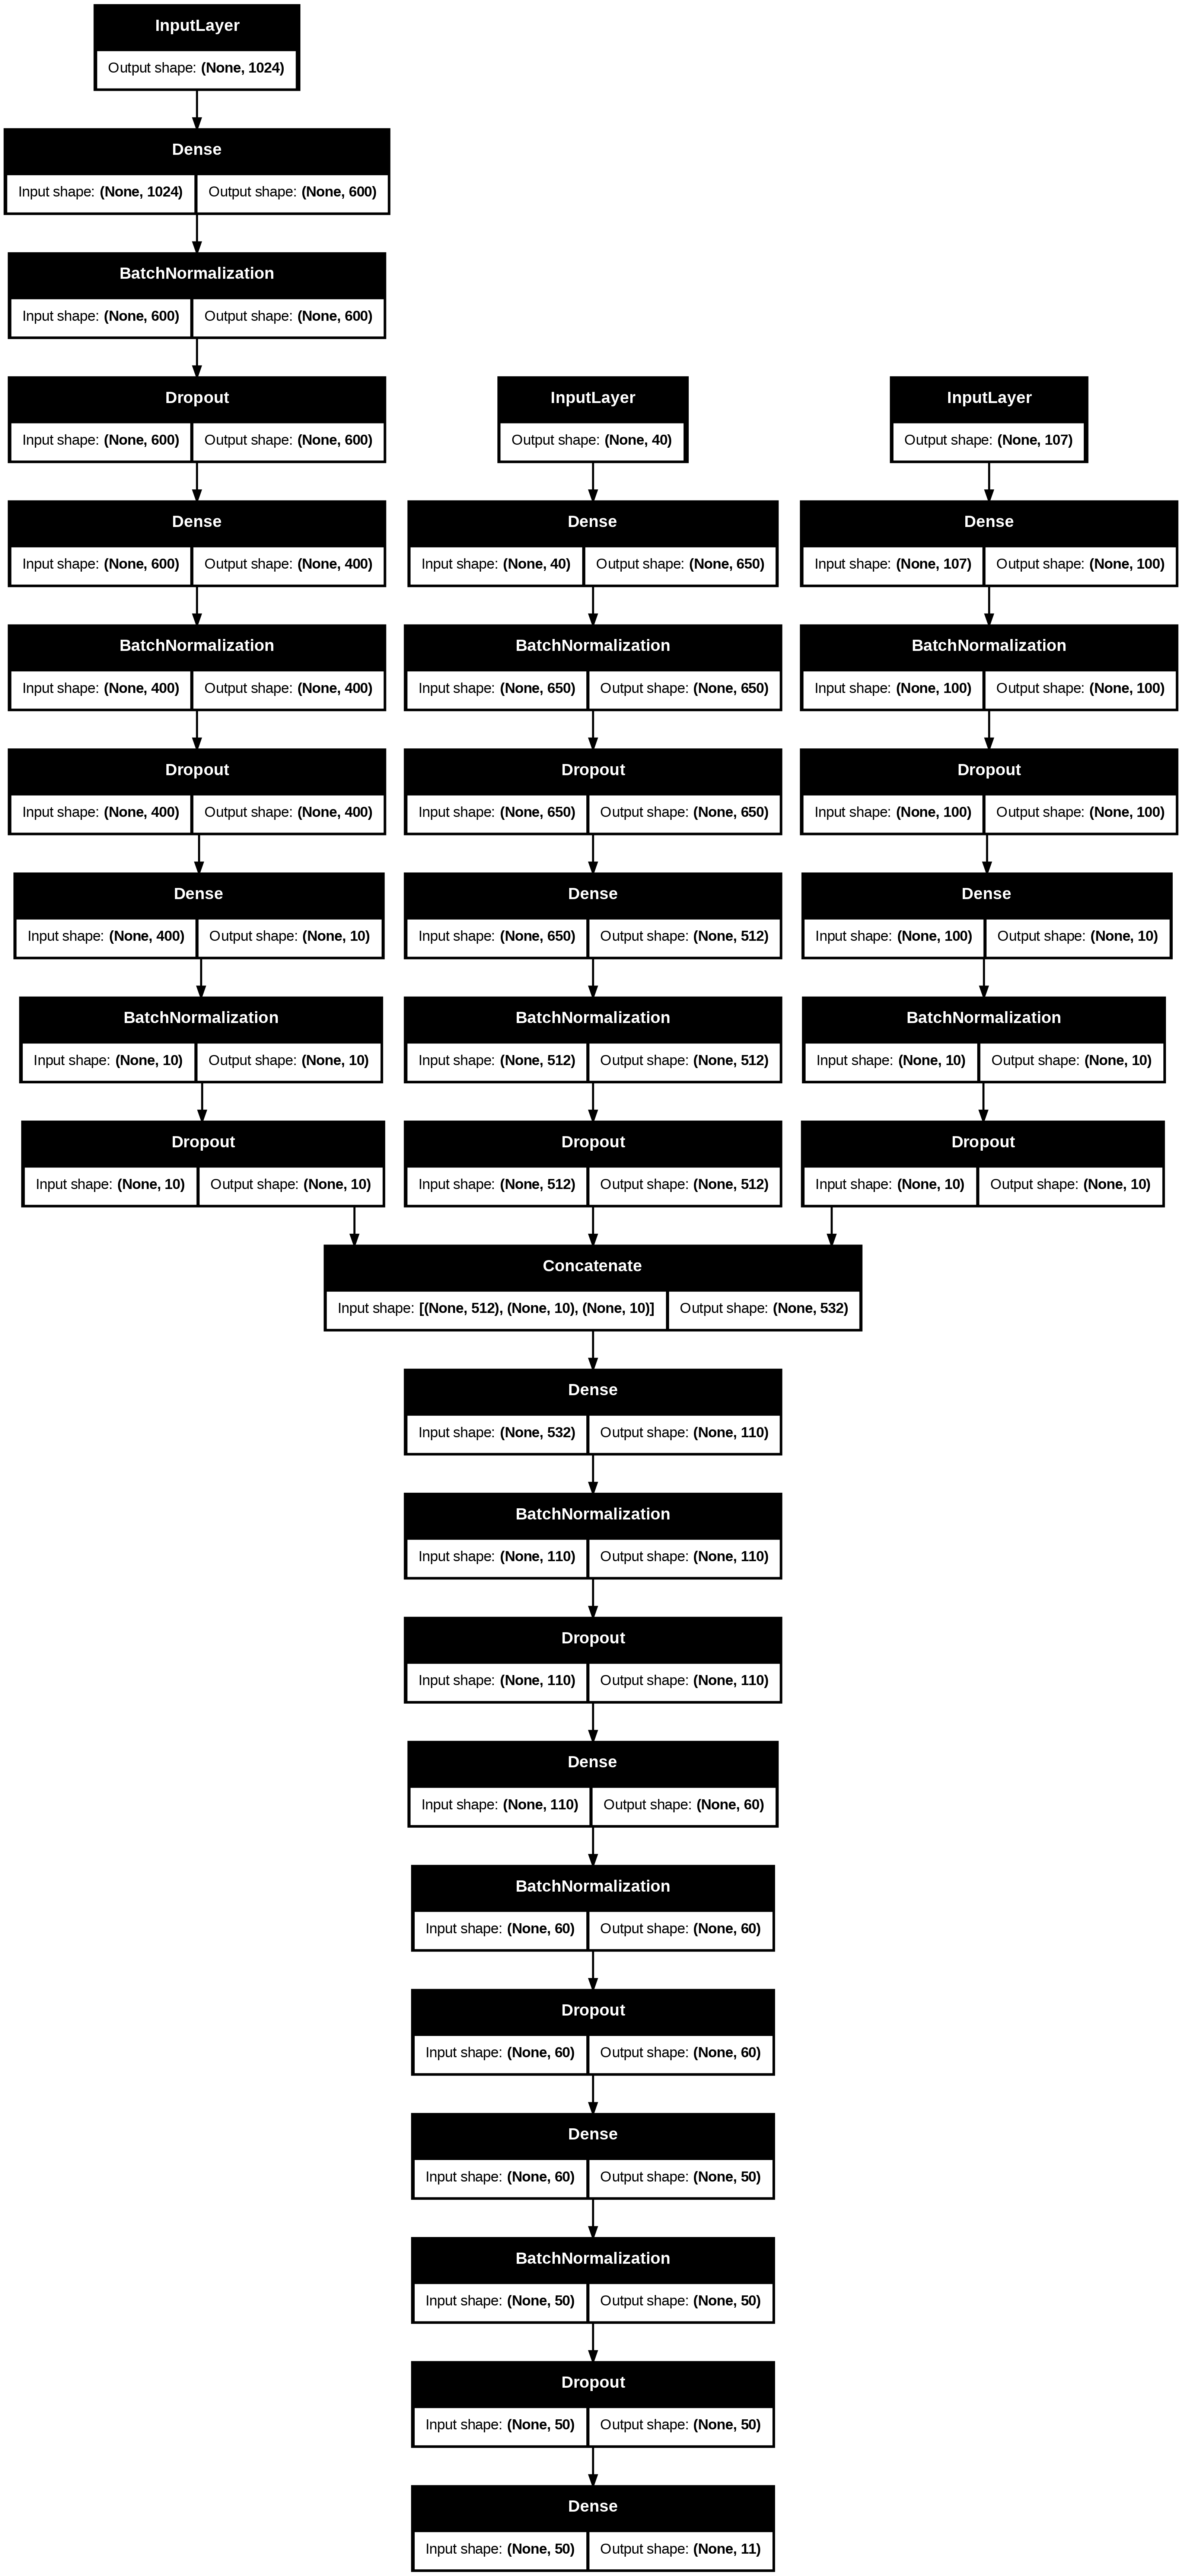

In [ ]:
plot_model(model_demand, show_shapes=True)

In [ ]:
predicted_demand = model_demand.predict([interval_scaled, categorical, embeddings_scaled])
predicted_df = pd.DataFrame(predicted_demand, columns=demand_variables)
predicted_df = rescale_df(predicted_df)
predicted_df['lon_WGS84'] = data_merged['lon_WGS84_x']
predicted_df['lat_WGS84'] = data_merged['lat_WGS84_x']
predicted_df['Grid_Max_Index'] = data_merged['Grid_Max_Index']
cols = ['lon_WGS84', 'lat_WGS84', 'Grid_Max_Index'] + [col for col in predicted_df.columns if col not in ['lon_WGS84', 'lat_WGS84', 'Grid_Max_Index']]
predicted_df = predicted_df[cols]
predicted_df.to_csv('demand_predicted_full.csv')

In [ ]:
# Now compile it all, to be ready for analysis

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/full_data_corine_management_3_WGS84.csv')
data = data.dropna(subset=['abelow_biom'])
data['Grid_Max_Index'] = data.index
data = data.reset_index(drop=True)
supply = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/supply_predicted_full.csv')
supply = supply.drop(columns=['Unnamed: 0'])
data_with_supply = pd.merge(data, supply, on='Grid_Max_Index', how='inner')
demand = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/demand_predicted_full.csv')
demand = demand.drop(columns=['Unnamed: 0'])
data_with_supply_demand = pd.merge(data_with_supply, demand, on='Grid_Max_Index', how='inner')
data_with_supply_demand.to_csv('full_data_with_supply_demand.csv')

/tmp/ipython-input-576522275.py:1: DtypeWarning: Columns (43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/full_data_corine_management_3_WGS84.csv')
/tmp/ipython-input-576522275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grid_Max_Index'] = data.index


In [ ]:
demand.describe()

,lon_WGS84,lat_WGS84,Grid_Max_Index,demand_biomass_wood,demand_biomass_energy,demand_hunting_game,demand_NWFP,demand_erosion_control,demand_air_quality,demand_CC_mitigation,demand_habitat,demand_cultural,demand_education,demand_healthcare
count,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000,1485032.00000
mean,14.65870,52.68604,10633508.11898,0.67985,0.70191,0.71978,0.36484,0.41967,0.30291,0.36982,0.37375,0.26571,0.25082,0.37209
std,9.48415,8.82692,4826945.73000,0.13001,0.15740,0.14419,0.11768,0.15248,0.14777,0.16581,0.11735,0.14643,0.15405,0.15758
min,-10.40590,35.98264,541807.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,8.91450,45.30740,6141739.75000,0.61653,0.61601,0.63491,0.29302,0.28555,0.19300,0.23234,0.30264,0.13883,0.14947,0.24410
50%,15.57061,50.76140,11816043.50000,0.70967,0.74577,0.73006,0.35724,0.41253,0.27826,0.36528,0.35629,0.25965,0.19864,0.33875
75%,22.46547,60.98195,14714374.25000,0.76018,0.79009,0.84100,0.41337,0.53534,0.39060,0.48949,0.41821,0.36225,0.29304,0.48738
max,31.56260,70.68322,19196584.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
